In [120]:
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0, '/astro/users/suberlak/S13Agg_analysis/packages/')
import variabilityFunctions as varF

In [121]:
def flux2absigma(flux, fluxsigma):
  """Compute AB mag sigma given flux and flux sigma"""
  FIVE_OVER_2LOG10 = 1.085736204758129569
  return FIVE_OVER_2LOG10 * fluxsigma / flux;


def flux2ab(flux):
  """Compute AB mag given flux"""
  return -2.5 * np.log10(flux) - 48.6;

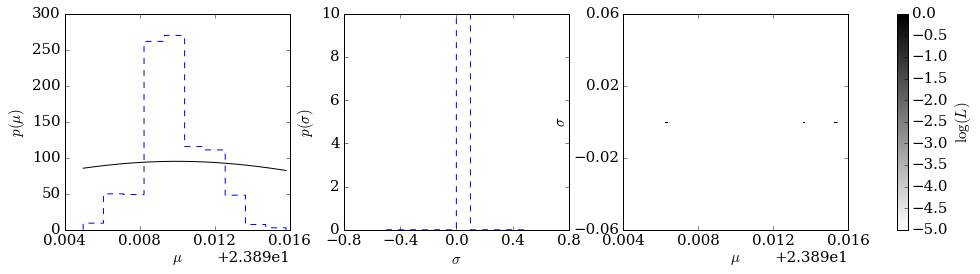

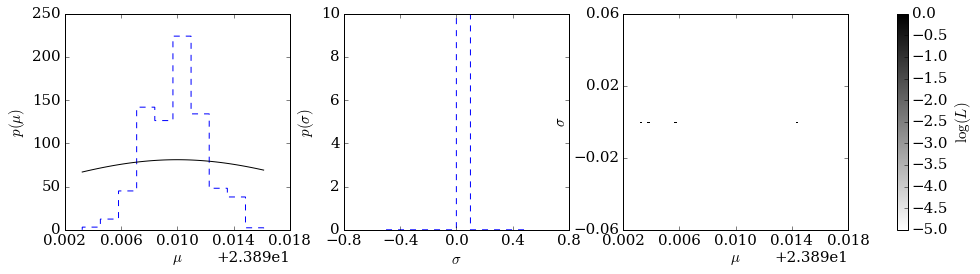

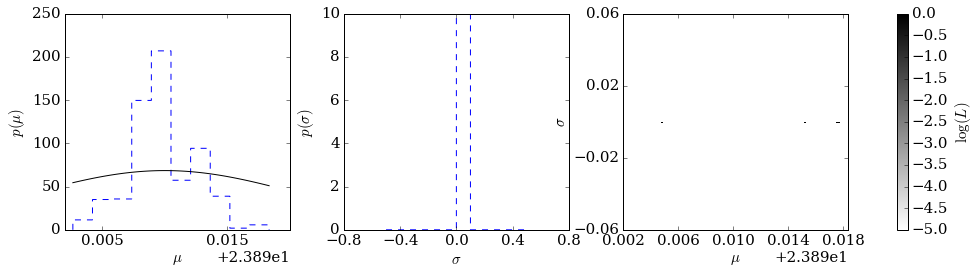

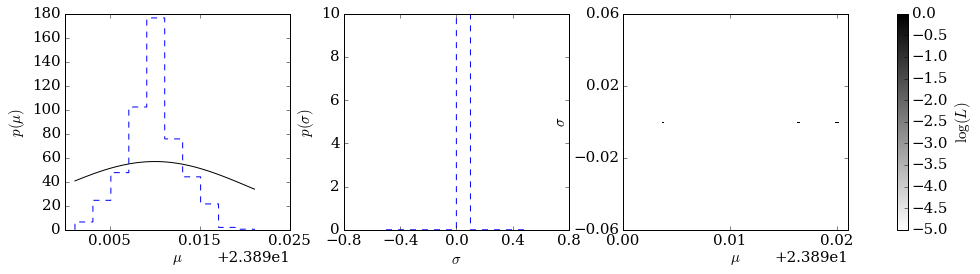

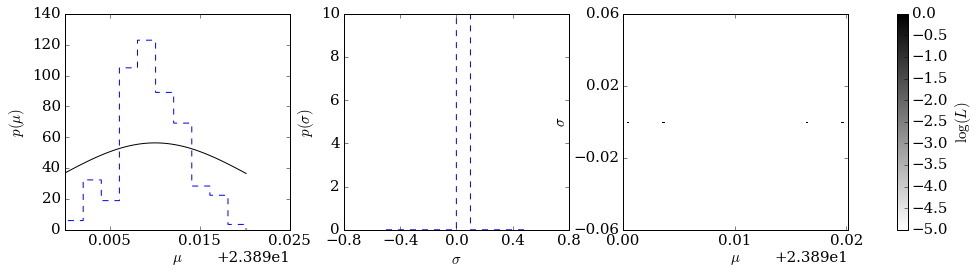

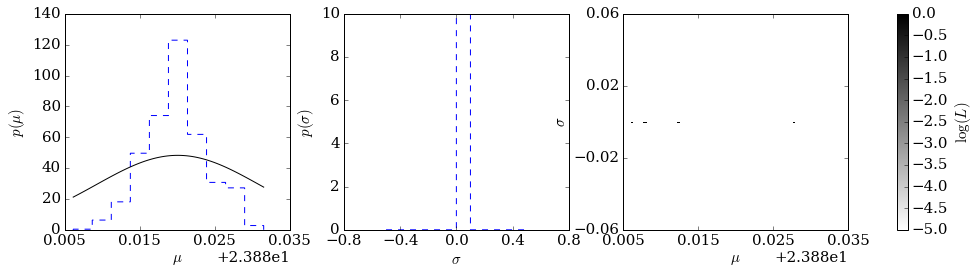

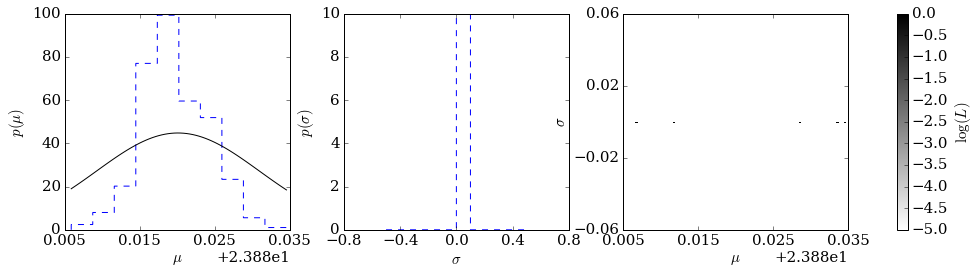

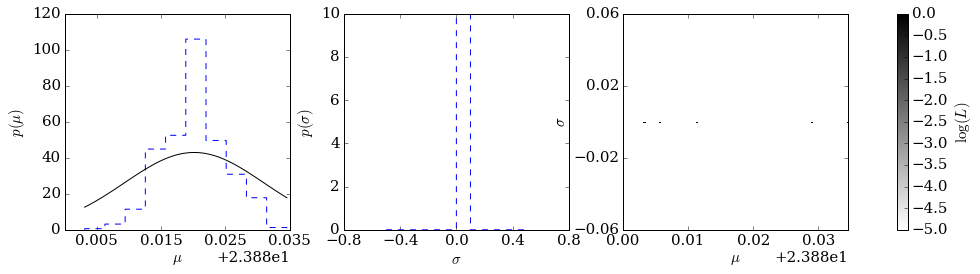

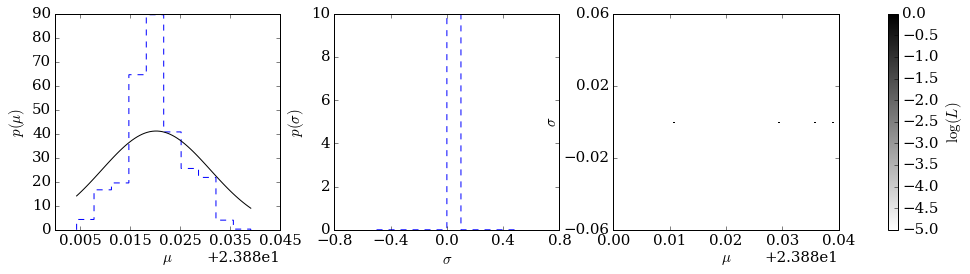

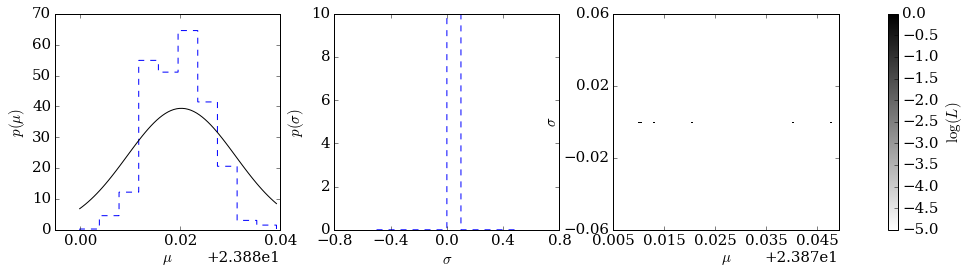

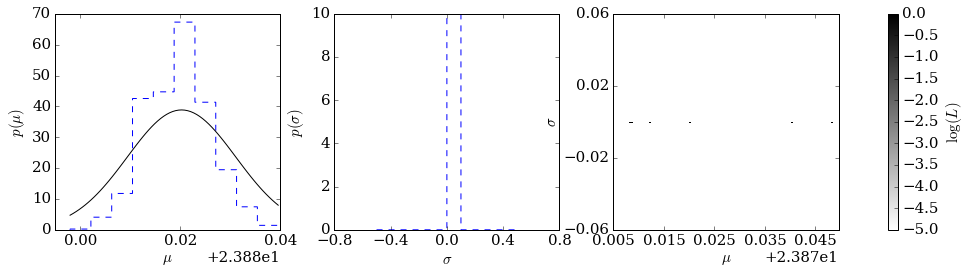

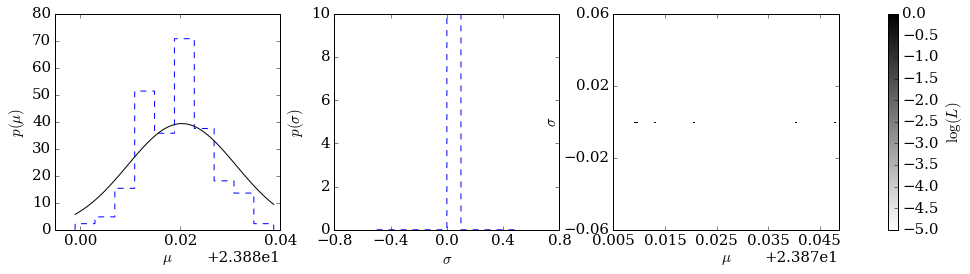

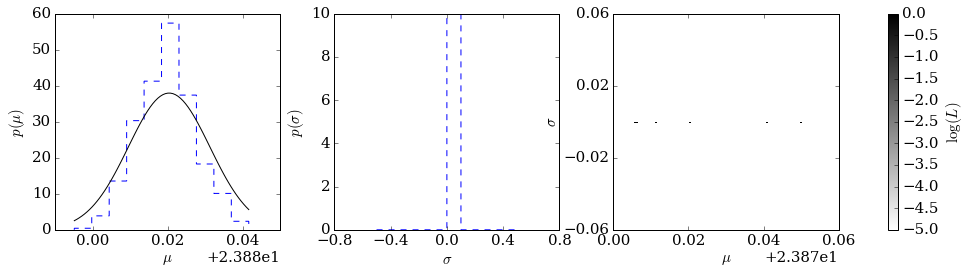

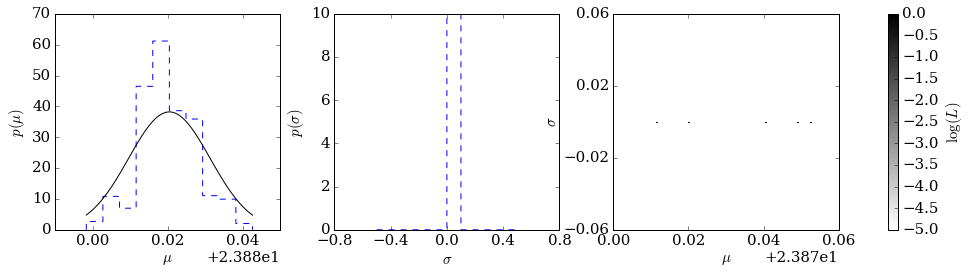

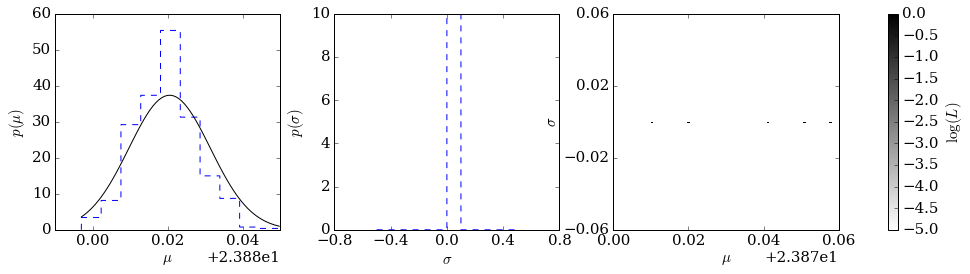

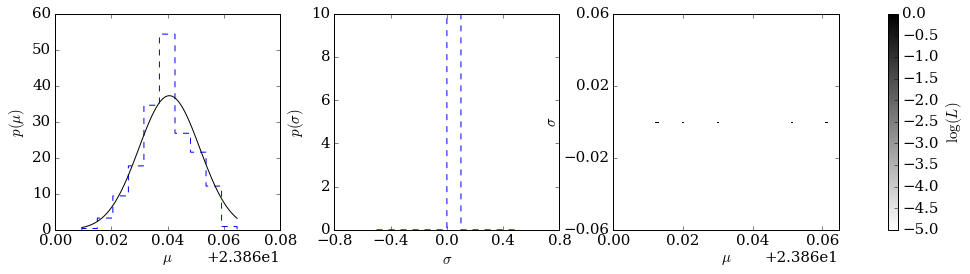

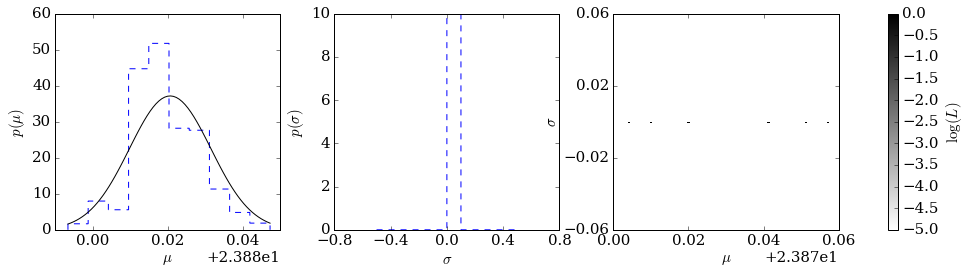

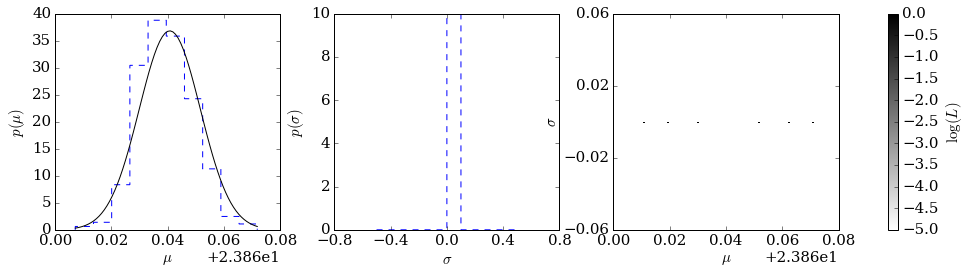

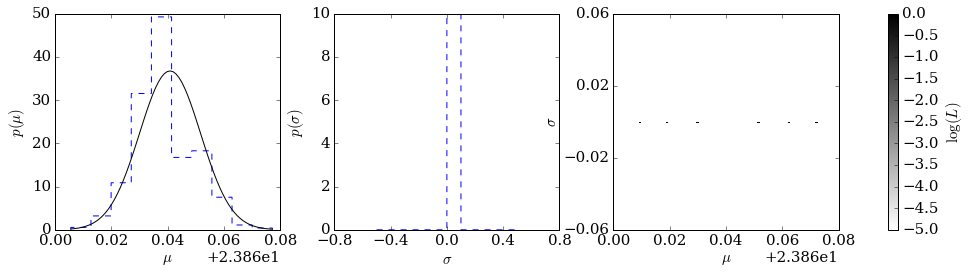

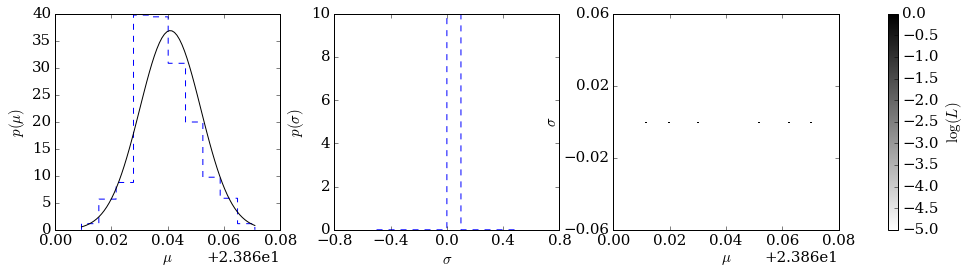

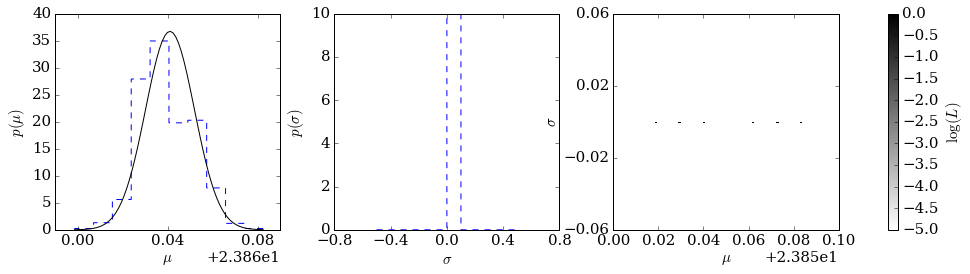

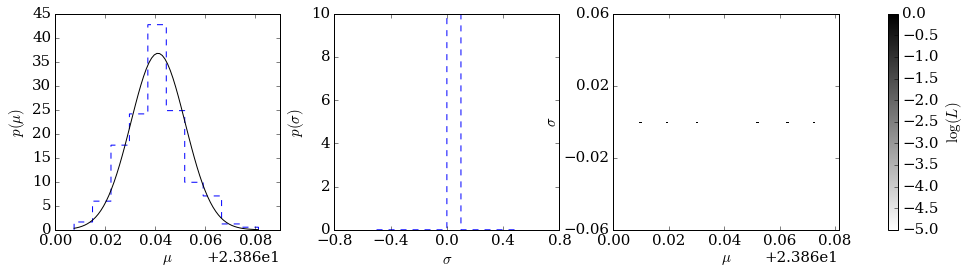

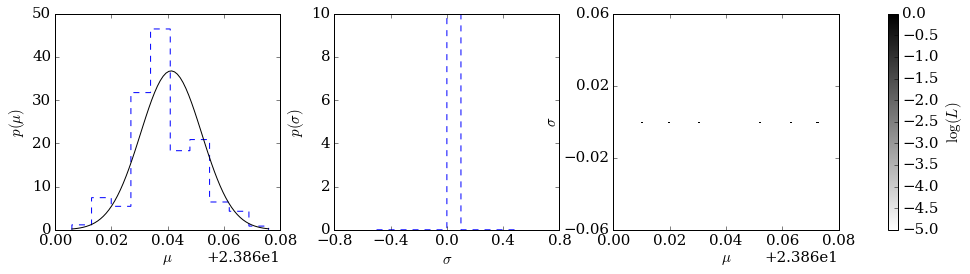

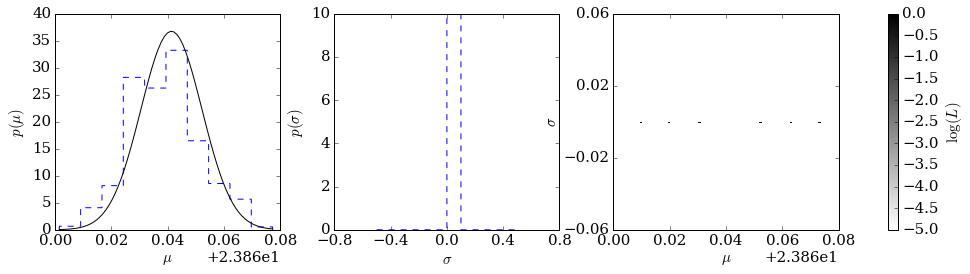

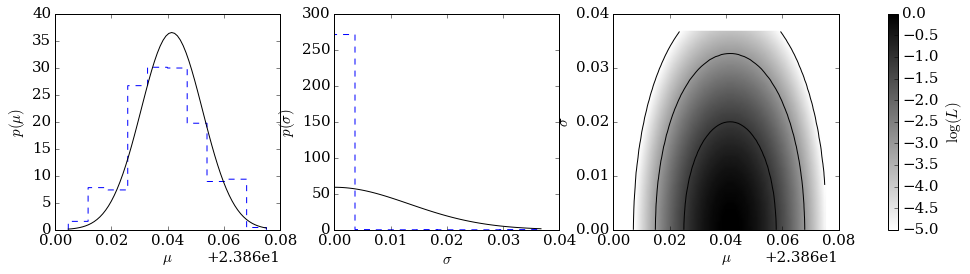

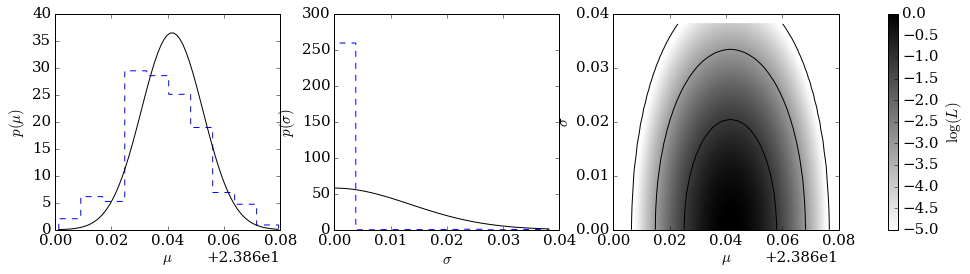

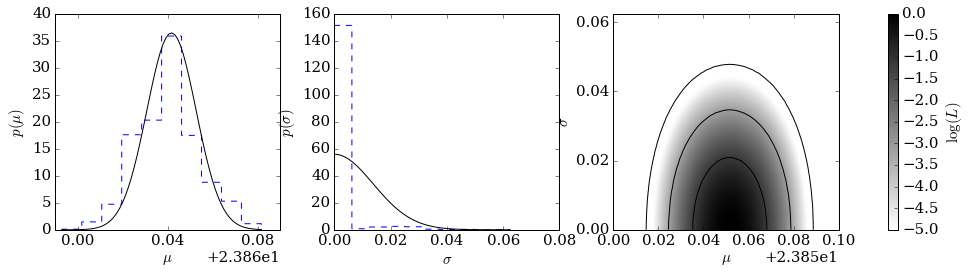

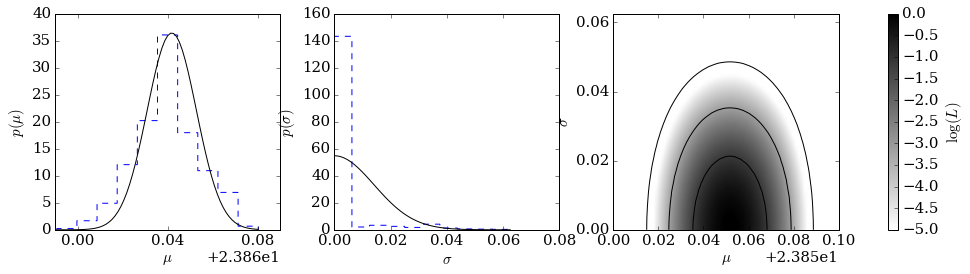

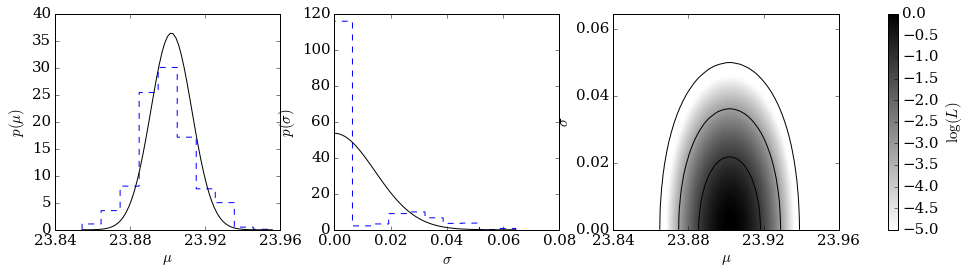

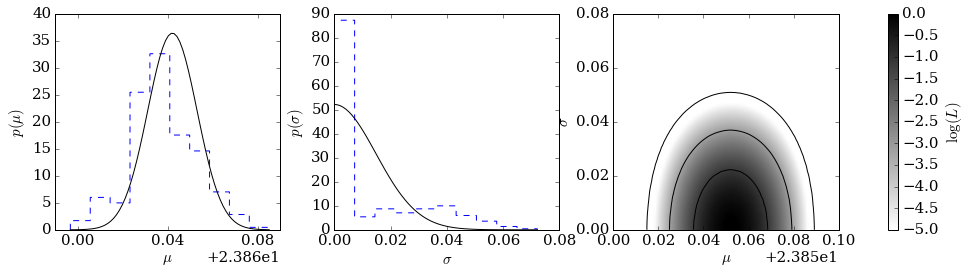

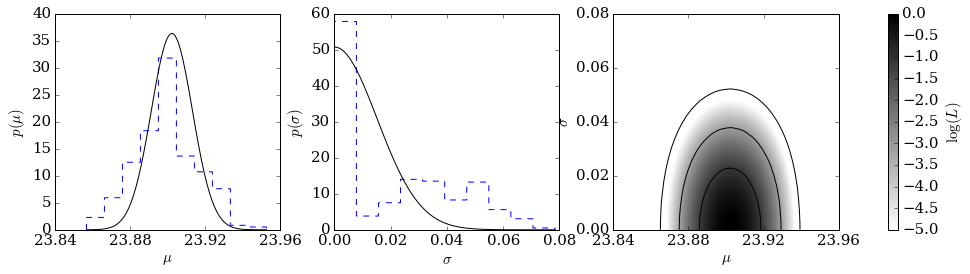

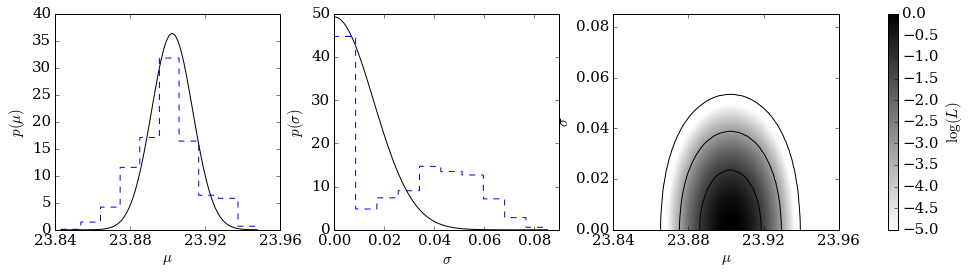

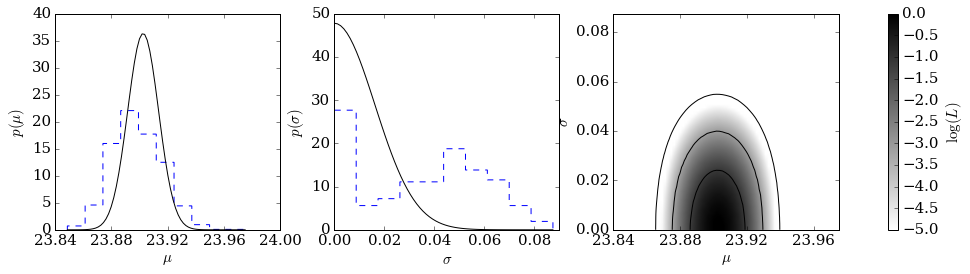

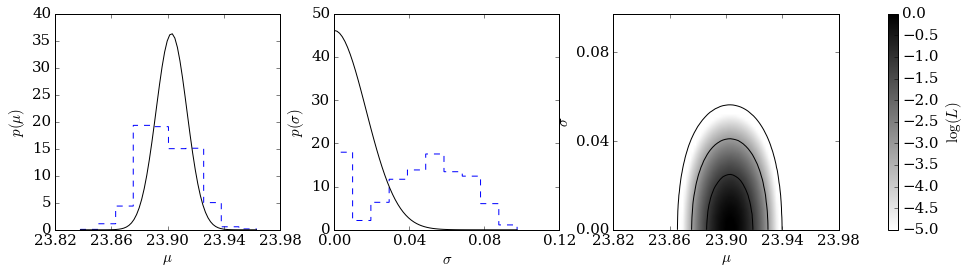

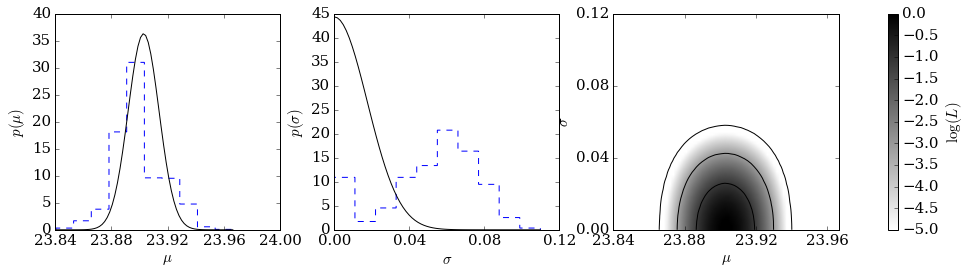

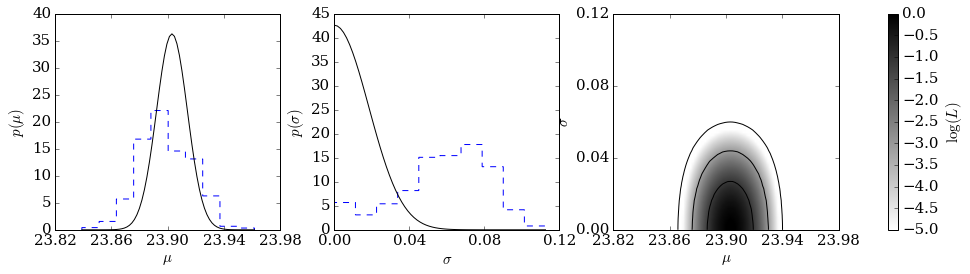

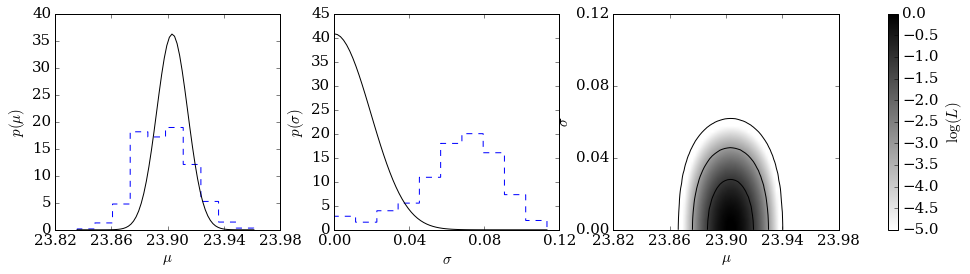

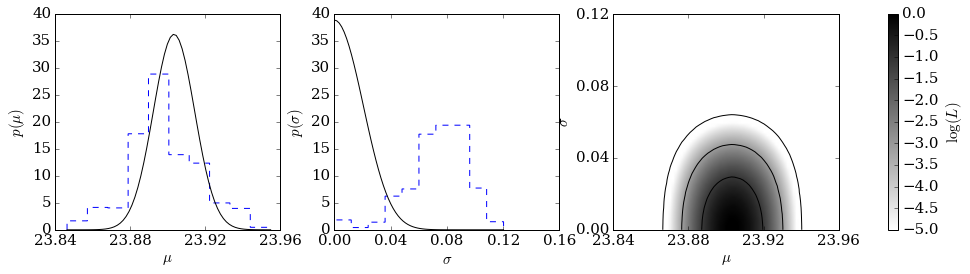

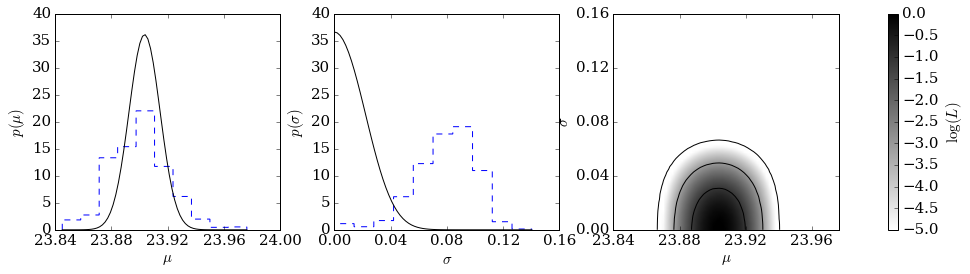

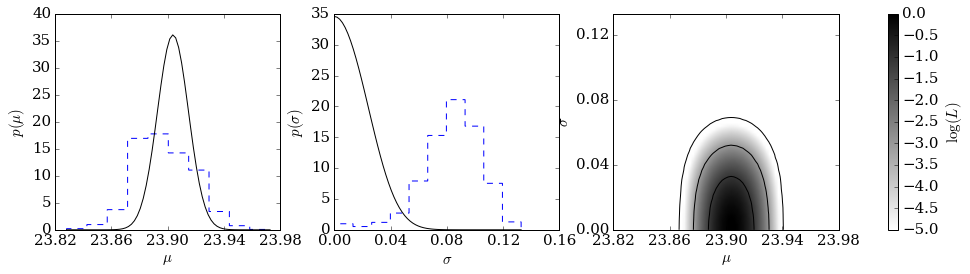

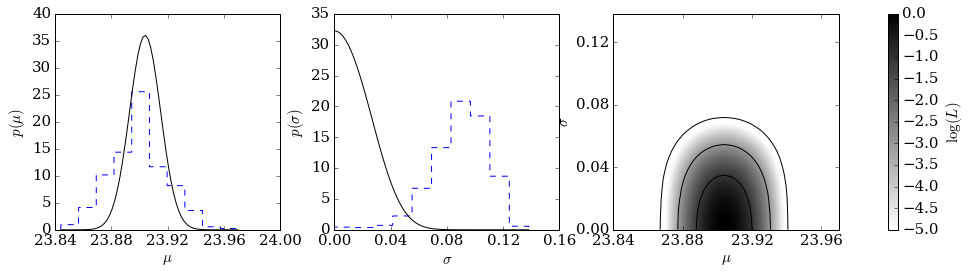

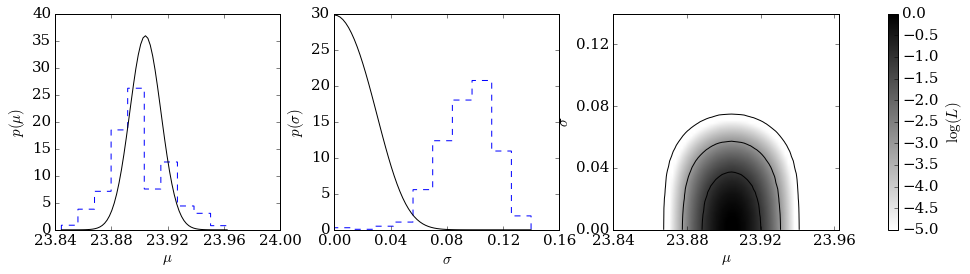

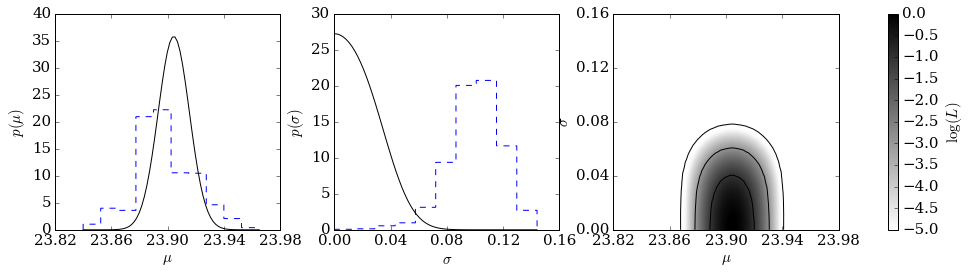

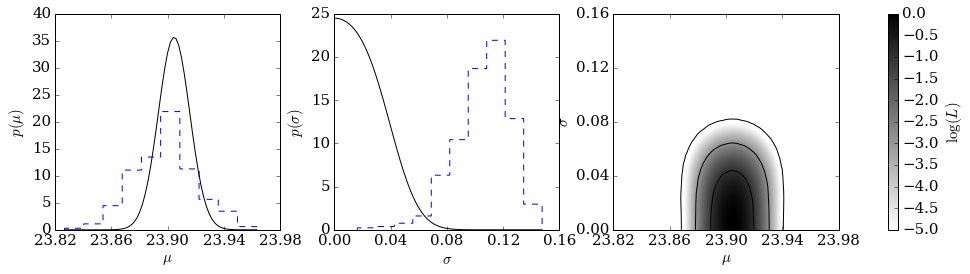

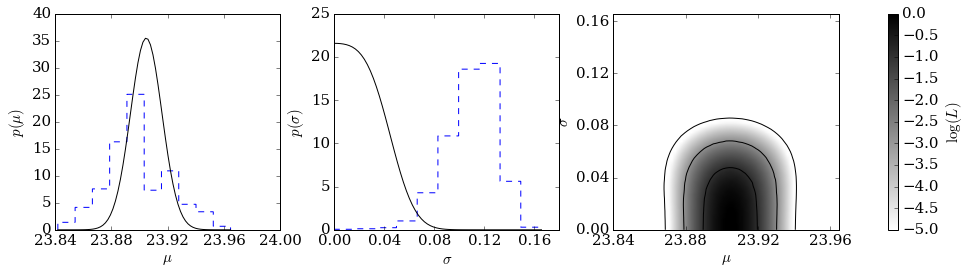

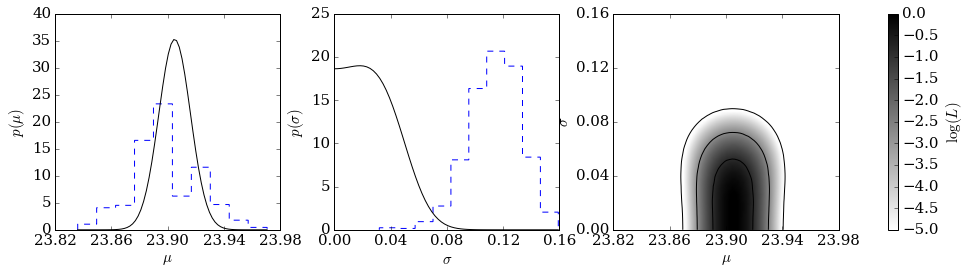

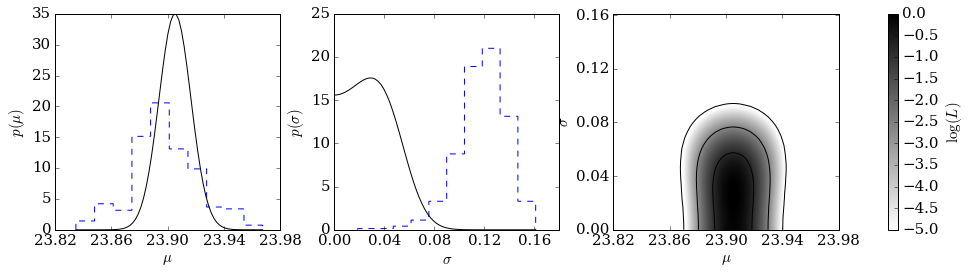

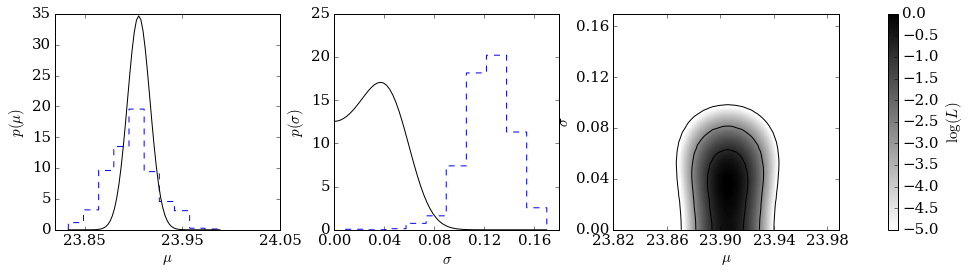

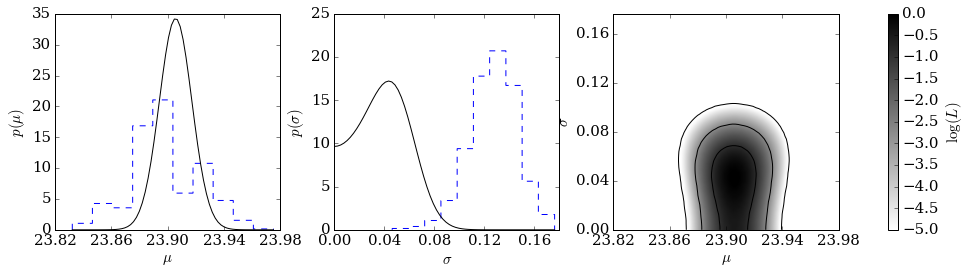

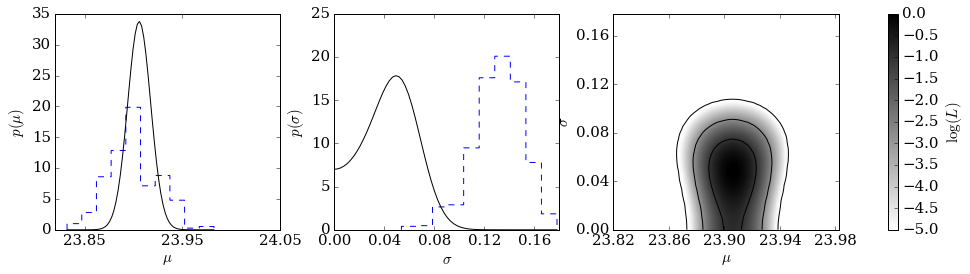

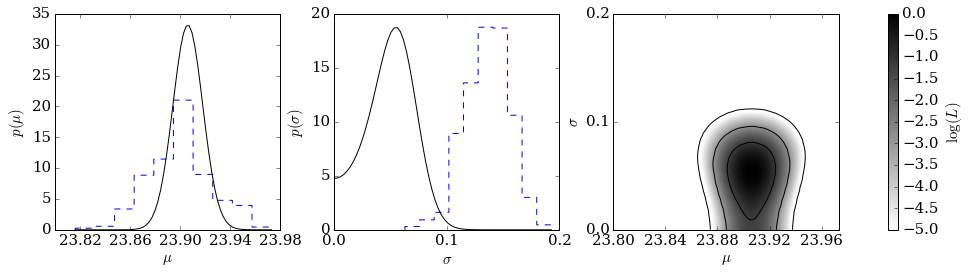

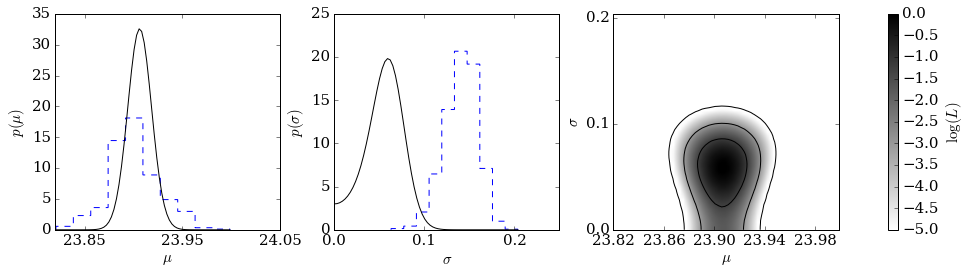

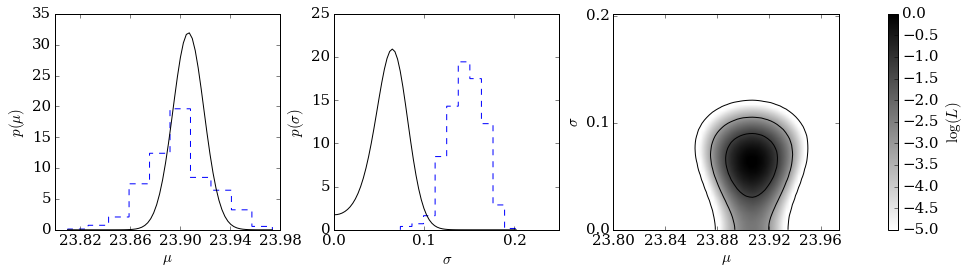

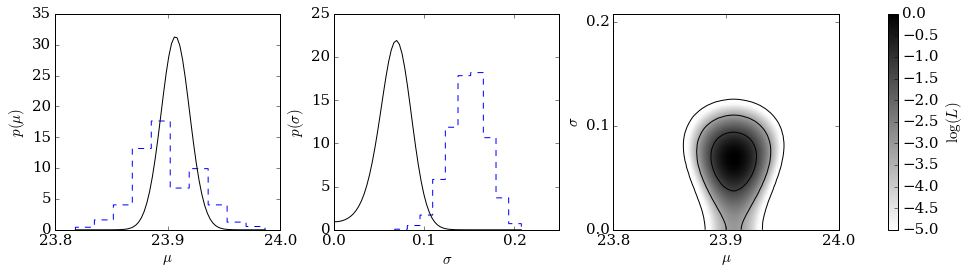

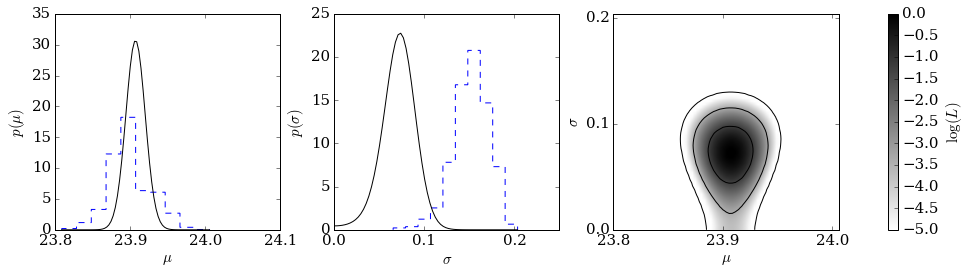

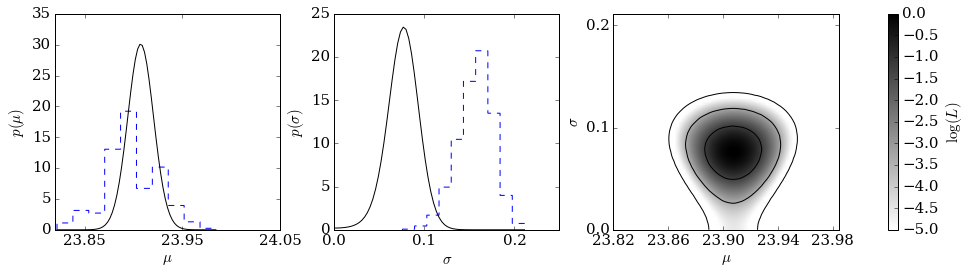

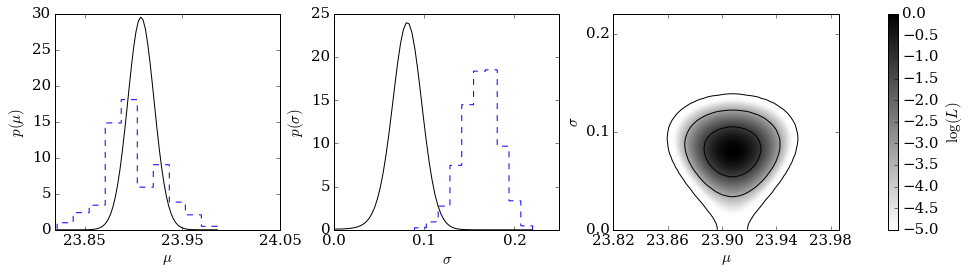

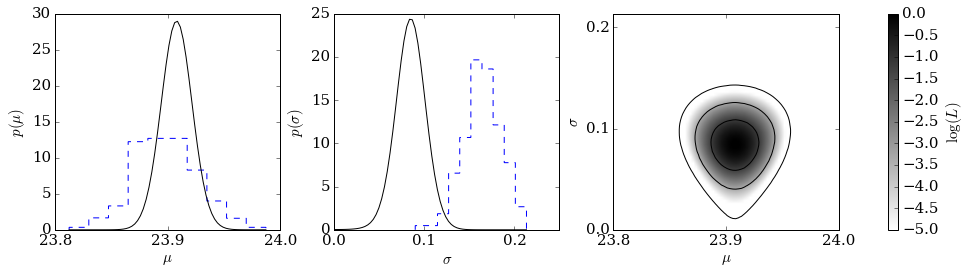

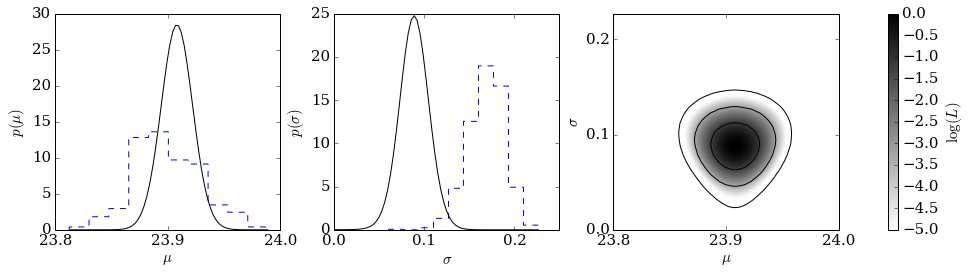

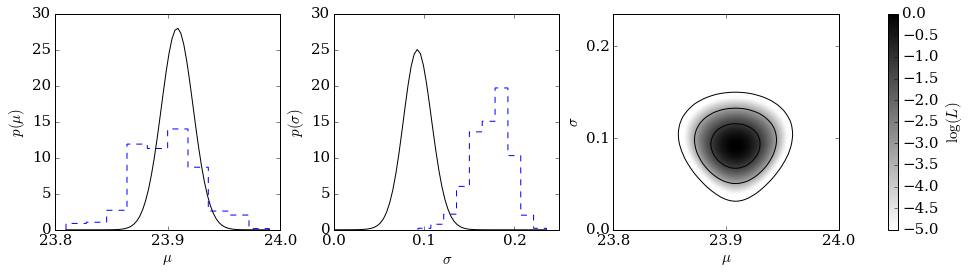

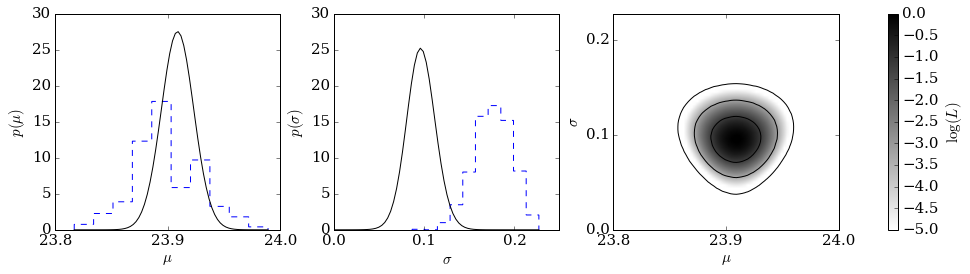

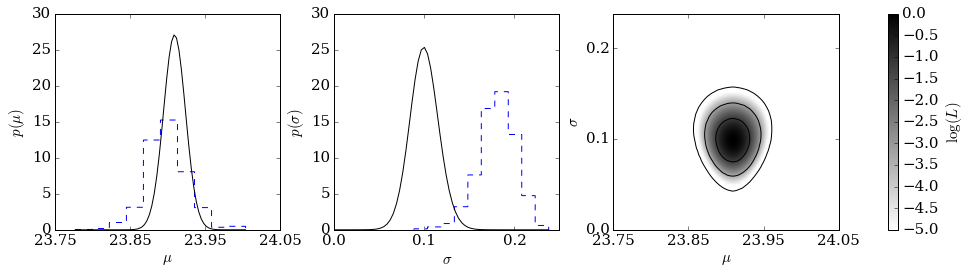

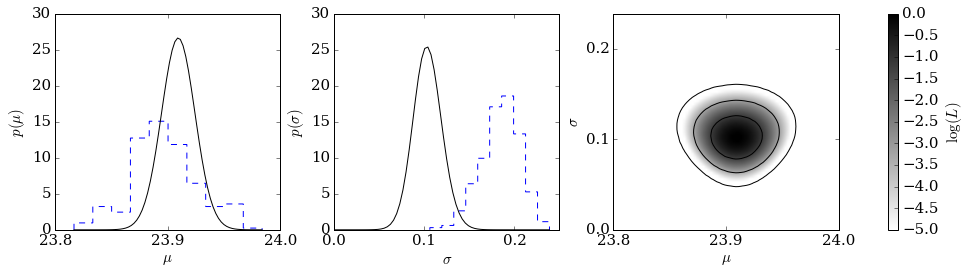

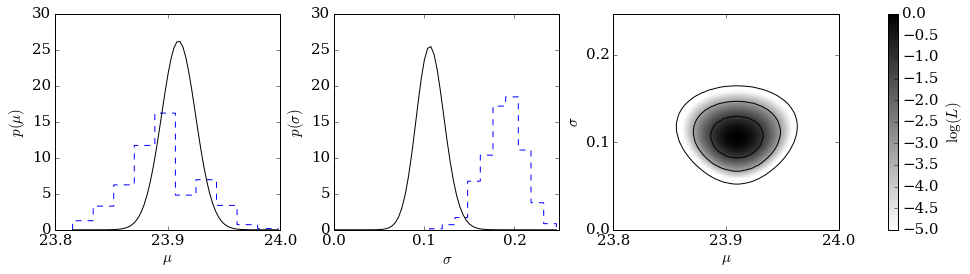

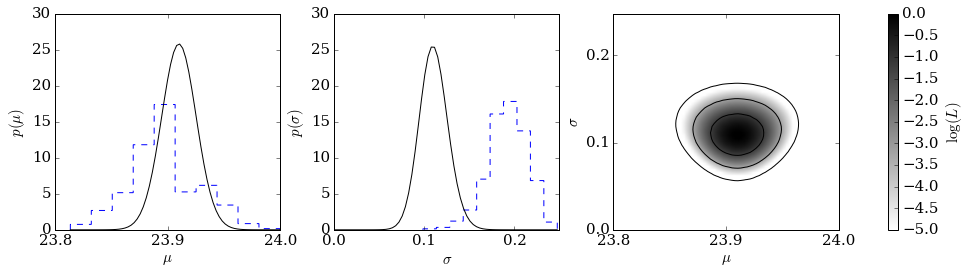

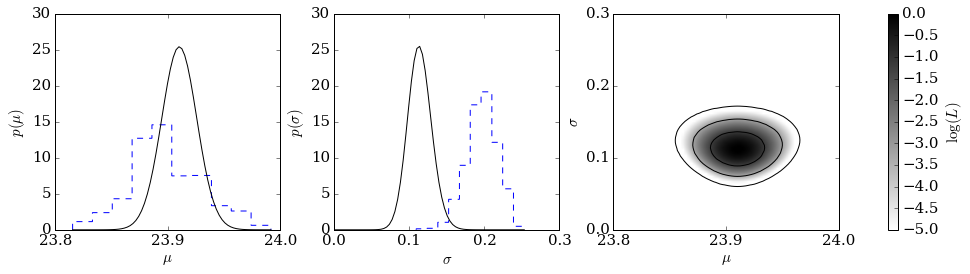

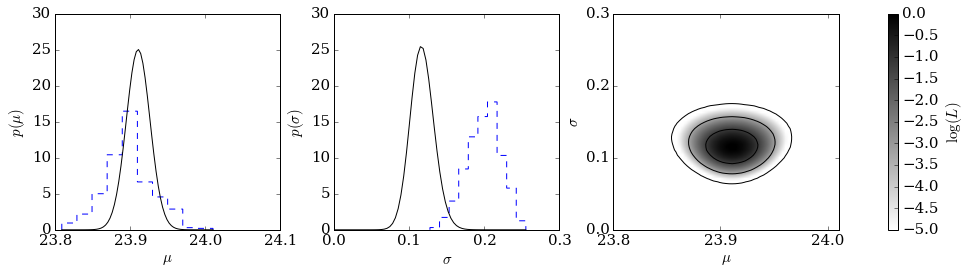

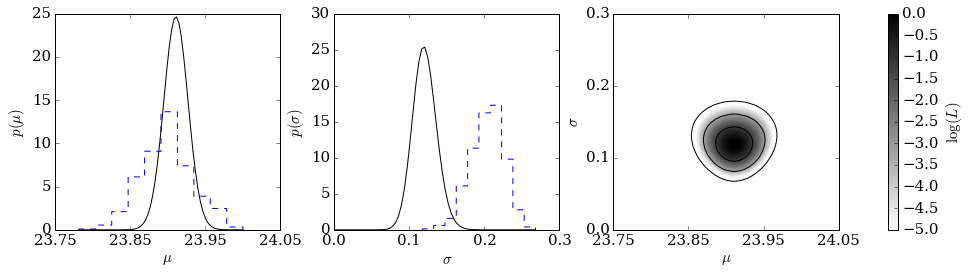

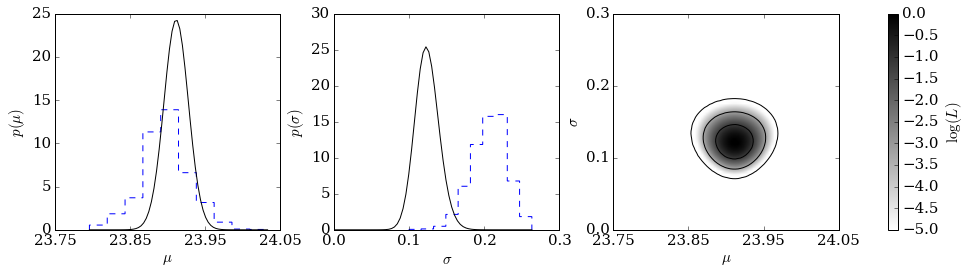

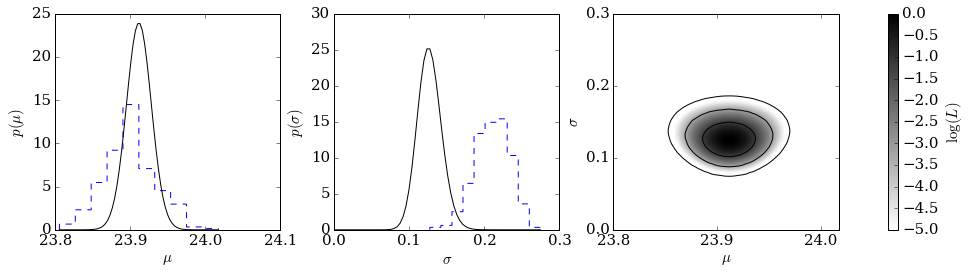

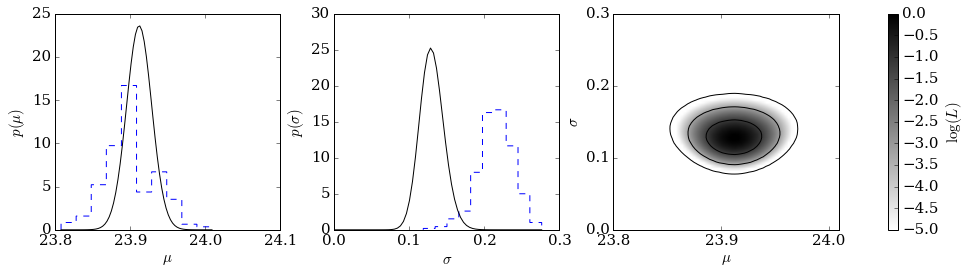

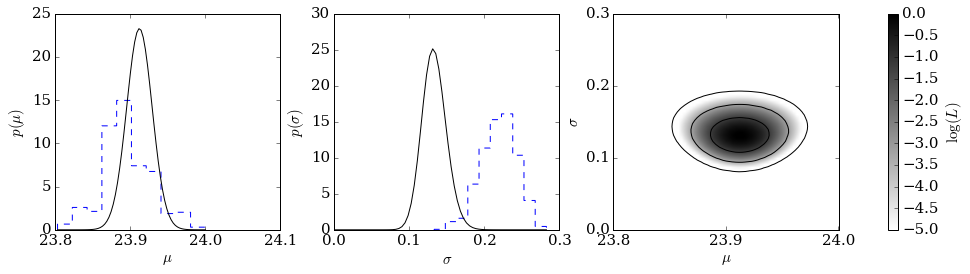

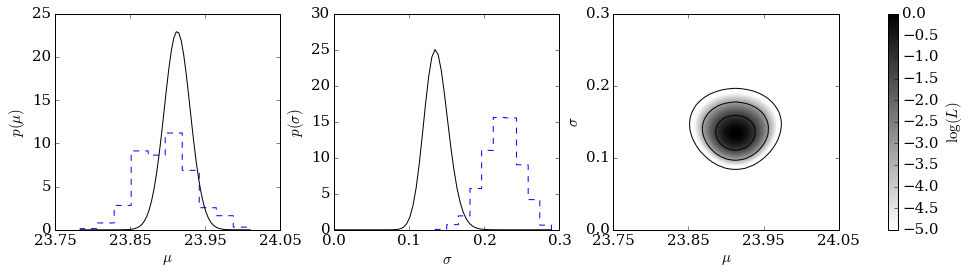

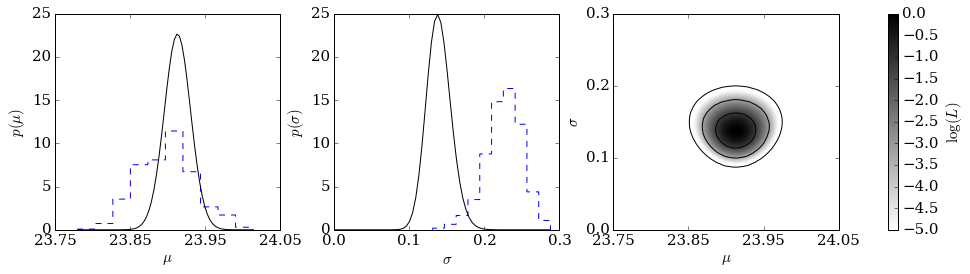

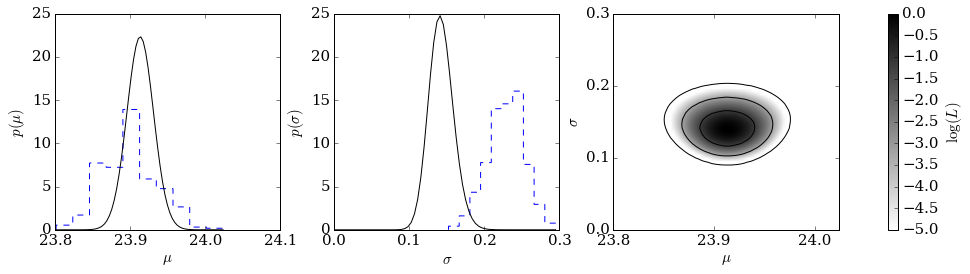

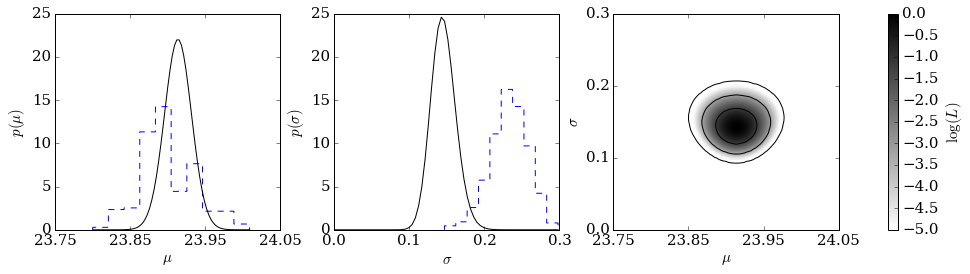

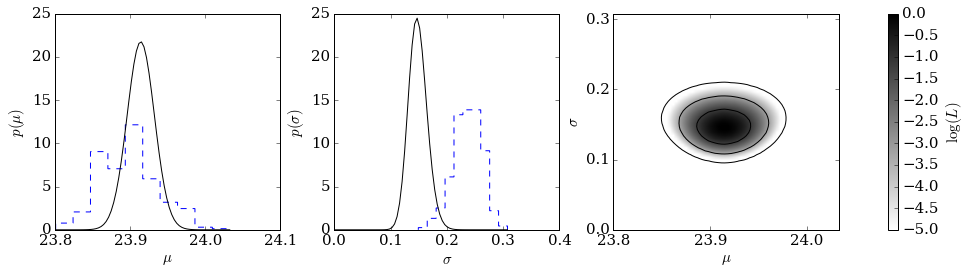

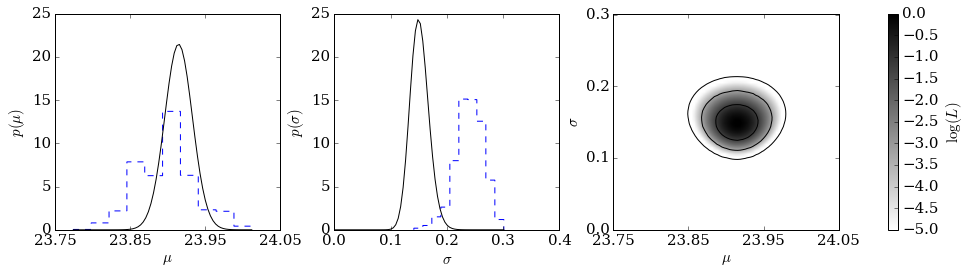

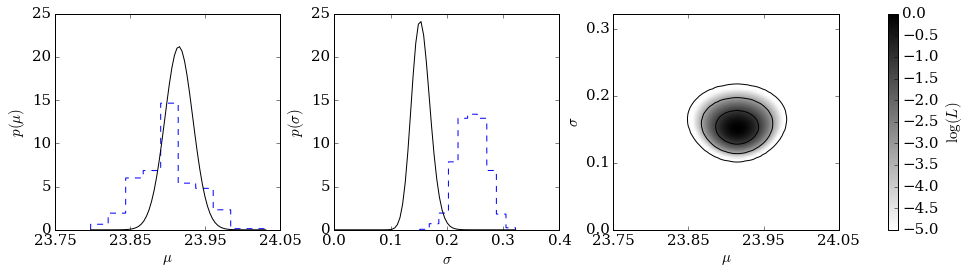

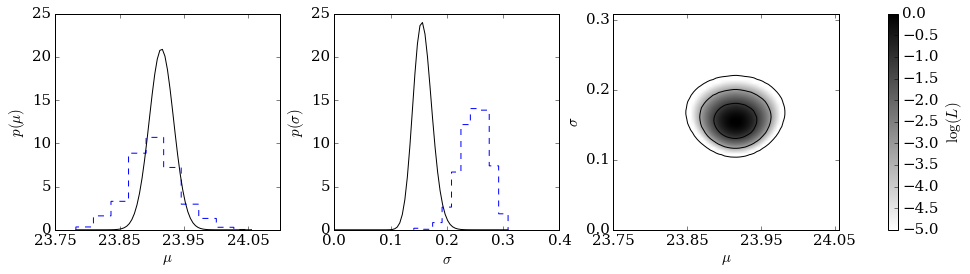

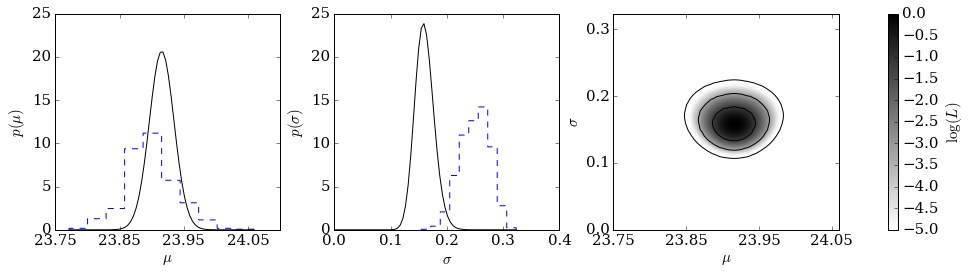

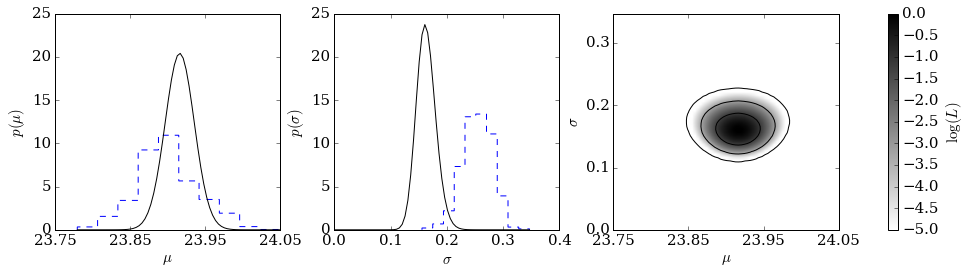

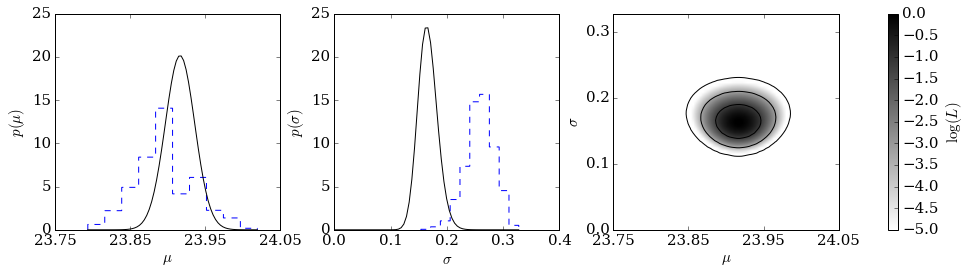

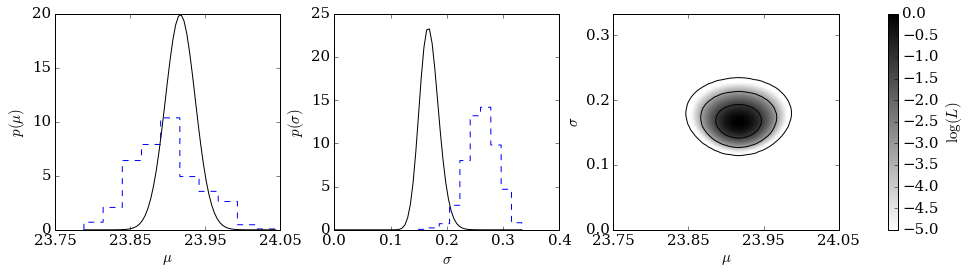

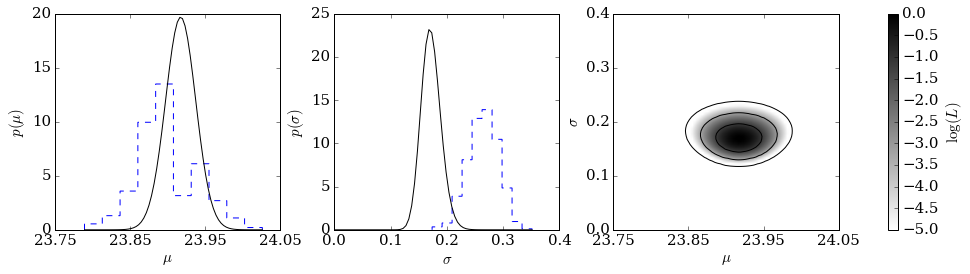

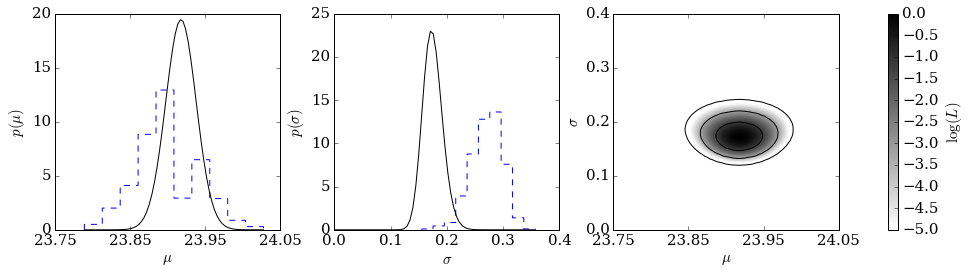

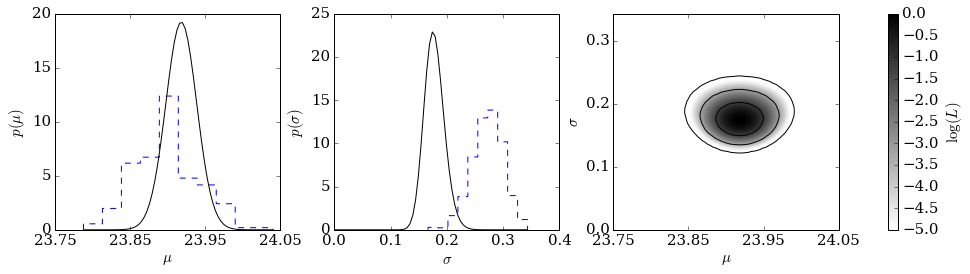

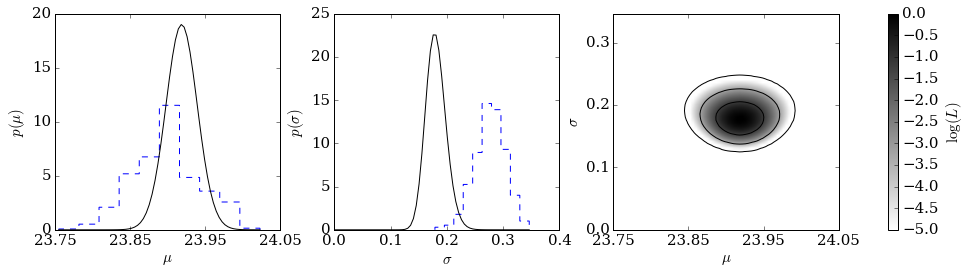

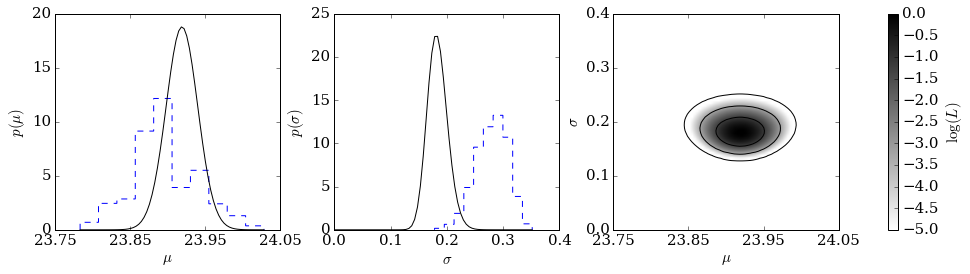

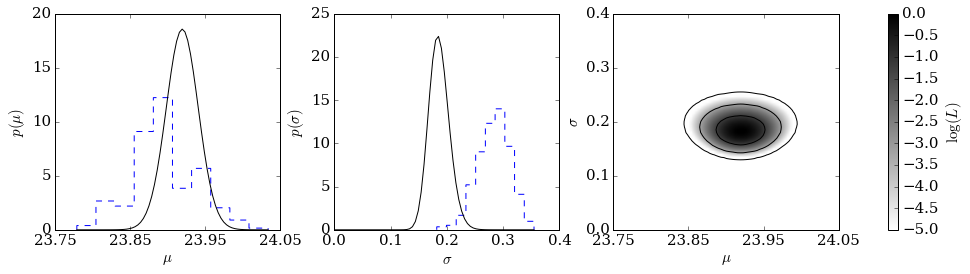

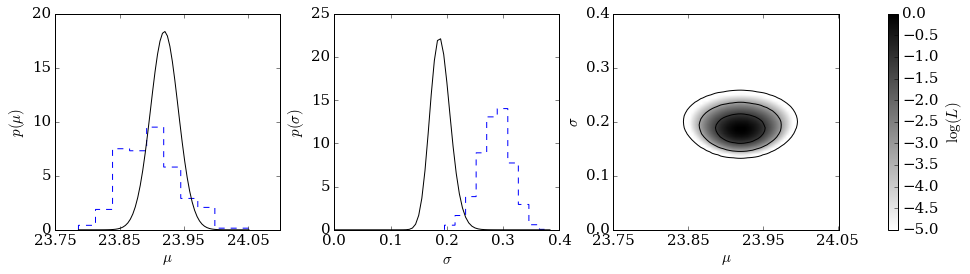

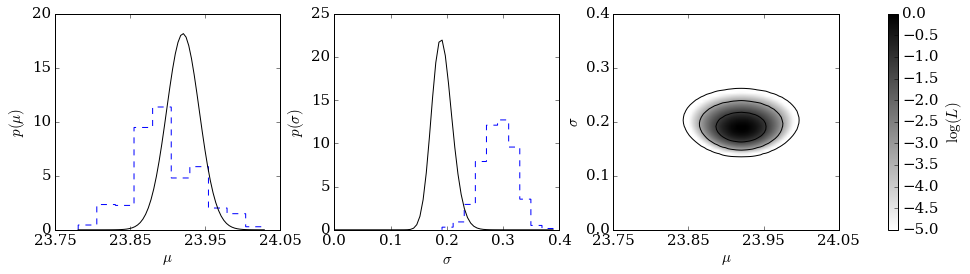

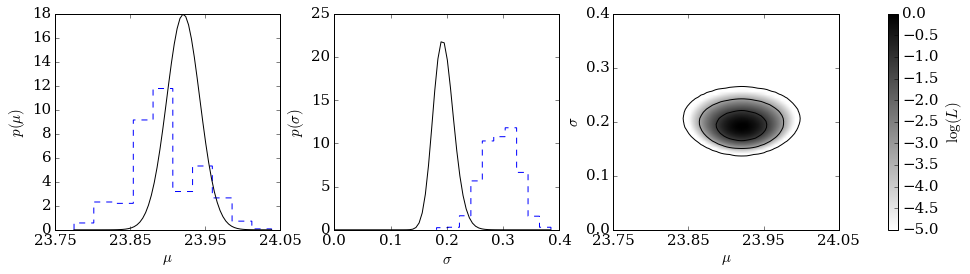

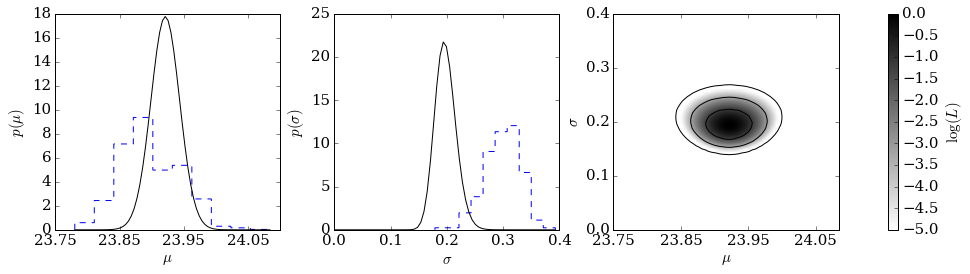

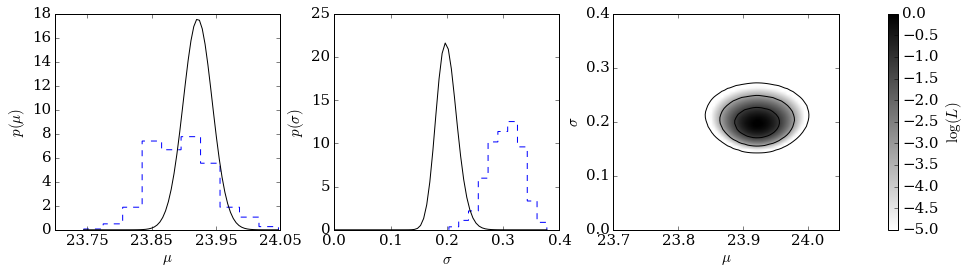

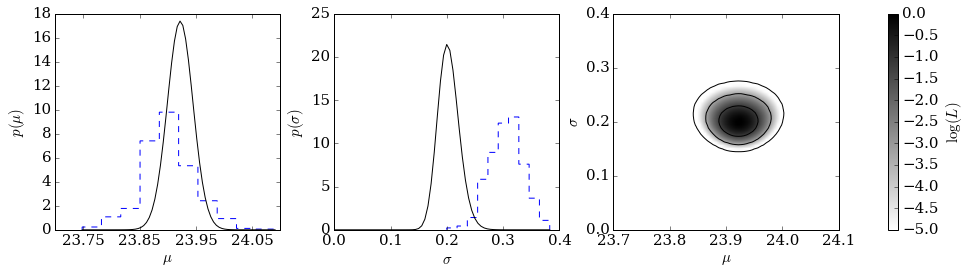

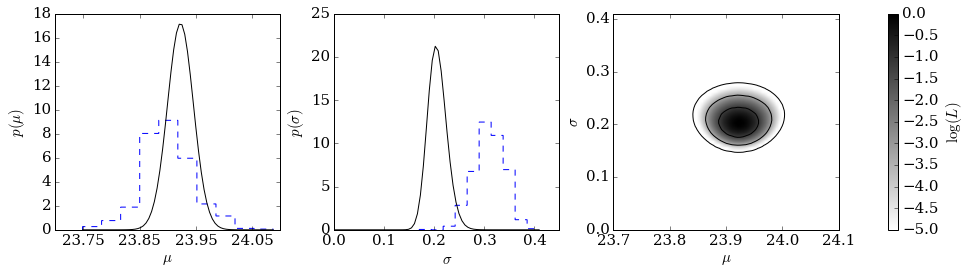

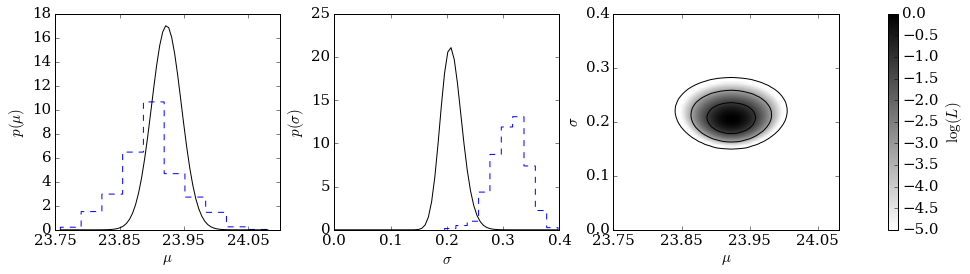

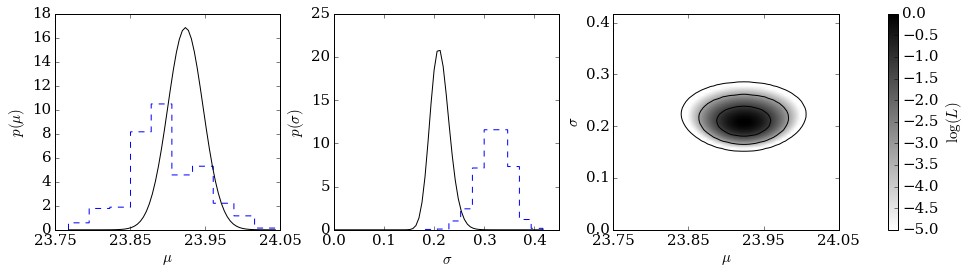

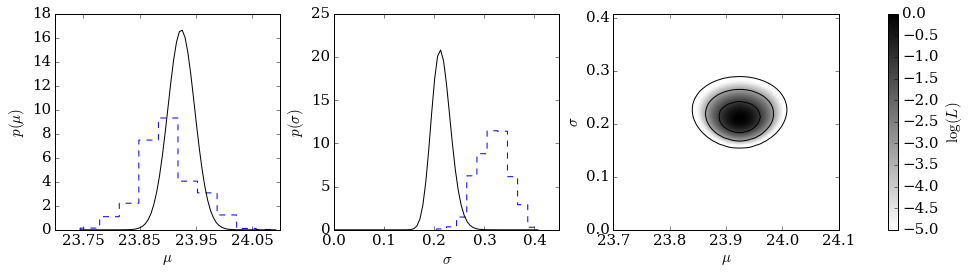

In [153]:
%matplotlib inline
error_factors = [0.01, 0.1]

amplitudes = np.linspace(0.01, 0.3, 100)
res = {}
res['amp_mean_ratio'] = np.zeros(0)
#res['amp_mag']    = np.zeros(0)
res['amp_flux']   = np.zeros(0)
res['sigma_mag']  = np.zeros(0)
res['sigma_flux'] = np.zeros(0)
res['mu_mag'] = np.zeros(0)
res['mu_flux']= np.zeros(0)

# np.linspace(0.01, 0.1,10)
for amp_factor in amplitudes : 
    factor= error_factors[1]
    t = np.arange(100)
    flux_mean = 1e-29
    A = amp_factor * F_mean
    
    
    flux = A * np.sin(t)+ flux_mean
    flux_err = factor*flux

    mag = flux2ab(flux)
    mag_err = flux2absigma(flux,flux_err)

    #A_mag = np.mean(amp_factor * np.mean(mag))
    
    # do it in magnitude space... 
    plot_data, mu_mag, sigma_mag =  varF.get_mu_sigma(mag,mag_err, return_plot_data=True)
    plot_astroml_five_eight(plot_data,amp_factor,factor)
    
    # do it in flux space ... 
    mu_flux, sigma_flux = varF.get_mu_sigma(flux, flux_err)
    
    res['amp_mean_ratio']  = np.append(res['amp_mean_ratio'],amp_factor)
    res['amp_flux'] = np.append(res['amp_flux'],A)
    #res['amp_mag'] = np.append(res['amp_mag'], A_mag )
    res['sigma_mag'] = np.append(res['sigma_mag'], sigma_mag)
    res['sigma_flux'] = np.append(res['sigma_flux'], sigma_flux)
    res['mu_mag'] = np.append(res['mu_mag'], mu_mag)
    res['mu_flux'] = np.append(res['mu_flux'], mu_flux)
    #print amp_factor,  sigma_mag, sigma_flux


In [152]:

reload(varF)

<module 'variabilityFunctions' from '/astro/users/suberlak/S13Agg_analysis/packages/variabilityFunctions.py'>

In [130]:
plot_data, mu_mag, sigma_mag =  varF.get_mu_sigma(mag,mag_err, return_plot_data=True)

In [148]:
from astroML.plotting import setup_text_plots

def plot_astroml_five_eight(plot_data,amp_factor,err_factor): 
    # Setup plots specifics
    setup_text_plots(fontsize=15, usetex=False)
    # Analog of Fig. 5.8
    #--------------------------------------------------
    # Plot data
    fig, ax = plt.subplots(1,3,figsize=(16, 4))
    fig.subplots_adjust(left=0.1, right=0.95, wspace=0.24,
                        bottom=0.15, top=0.9)

    # first plot the histograms for mu
    #ax = fig.add_subplot(121)
    mu, sigma = plot_data['mu'], plot_data['sigma']
    p_mu, p_sigma = plot_data['p_mu'], plot_data['p_sigma']

    # plot the marginalized distribution
    ax[0].plot(mu,p_mu, '-k', label='marginalized')

    # plot the bootstrap distribution
    #bins = np.linspace(-3, 5, 14)
    ax[0].hist(plot_data['mu_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approximate')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    #ax.plot([mu_true, mu_true], [0, 1.0], ':k', lw=1)

    ax[0].set_xlabel(r'$\mu$')
    ax[0].set_ylabel(r'$p(\mu)$')
    ticks = ax[0].get_xticks()
    ax[0].set_xticks(ticks[1::2])
    #ax[0].set_xticks(ax.get_xticklabels()[::2], visible=False)
    #ax.set_ylim(0, 1.0)


    # first plot the histograms for sigma
    #ax = fig.add_subplot(122)

    # plot the marginalized distribution
    ax[1].plot(sigma, p_sigma, '-k', label='marginalized')

    # plot the bootstrap distribution
    #bins = np.linspace(0, 5, 31)
    ax[1].hist(plot_data['sigma_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approximate')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    #ax.plot([sigma_true, sigma_true], [0, 1.0], ':k', lw=1)

    ax[1].set_xlabel(r'$\sigma$')
    ax[1].set_ylabel(r'$p(\sigma)$')
    #ax[1].legend(loc=1, prop=dict(size=15))
    ticks = ax[1].get_xticks()
    ax[1].set_xticks(ticks[::2])
    #ax.set_xlim(0, 5.0)
    #ax.set_ylim(0, 1.0)
    # Analog of Fig. 5.7 
    # Print the Gaussian Distribution with Gaussian Errors  logarithm of the posterior probability density function 
    #------------------------------------------------------------
    # plot the results
    from astroML.plotting.mcmc import convert_to_stdev

    im = ax[2].imshow(plot_data['logL'], origin='lower',
               extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
               cmap=plt.cm.binary,
               aspect='auto',vmin=-5, vmax=0)
    #cbar = plt.colorbar(im , ax=ax[2])
    #

    import matplotlib as mpl
    cax,kw = mpl.colorbar.make_axes([axis for axis in ax.flat])
    cbar = plt.colorbar(im, cax=cax, **kw)
    cbar.set_label(r'$\log(L)$')

    #cbar.set_clim(-5, 0)

    #plt.text(0.5, 0.93,
    #         (r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ '
    #          r'\sigma_{\rm true}=1,\ n=10$'),
    #         bbox=dict(ec='k', fc='w', alpha=0.9),
    #         ha='center', va='center', transform=plt.gca().transAxes)

    ax[2].contour(mu, sigma, convert_to_stdev(plot_data['logL']),
                levels=(0.683, 0.955, 0.997),
                colors='k')

    ax[2].set_xlabel(r'$\mu$')
    ax[2].set_ylabel(r'$\sigma$')
    ticks = ax[2].get_xticks()
    ax[2].set_xticks(ticks[::2])

    ticks = ax[2].get_yticks()
    ax[2].set_yticks(ticks[::2])

    #plt.tight_layout()
    name = '../data_products/Fig_5-8_AstroML_A_'+str(amp_factor)+'e_'+str(err_factor)+'.png'
    #plt.tight_layout()
    plt.savefig(name)
    plt.show()

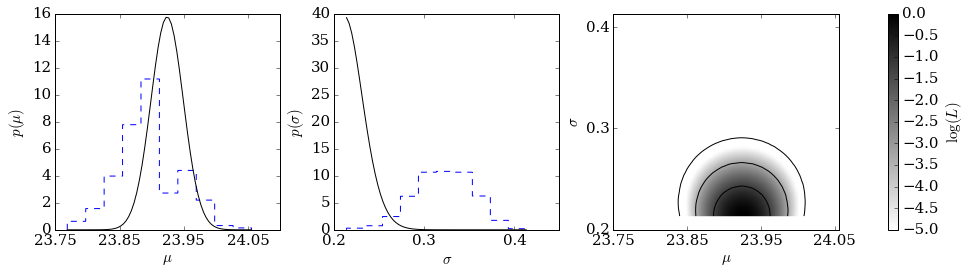

In [149]:
plot_astroml_five_eight(plot_data,amp_factor,factor)

In [116]:
res_df = pd.DataFrame(res)

res_df['sigma_over_mean_flux'] = res_df['sigma_flux'] / flux_mean
res_df['sigma_over_mean_mag'] = res_df['sigma_mag'] / flux2ab(flux_mean)

res_df['sigma_over_mu_flux'] = res_df['sigma_flux'] / res_df['mu_flux']
res_df['sigma_over_mu_mag'] = res_df['sigma_mag'] / res_df['mu_mag']

res_df['quad_err_sigma_flux'] = np.sqrt(res_df['sigma_flux'] ** 2.0 + np.mean(flux_err)**2.0)
res_df['quad_err_sigma_mag'] = np.sqrt(res_df['sigma_mag'] ** 2.0 + np.mean(mag_err)**2.0)

In [117]:
res_df.to_csv('../data_products/Simulated_LC_10_percent_err.csv')

In [113]:
pwd

u'/astro/users/suberlak/S13Agg_analysis/code'

In [119]:
res_df[30:]

amp_flux  amp_mean_ratio       mu_flux     mu_mag    sigma_flux  \
30  9.787879e-31        0.097879  9.907276e-30  23.901629  0.000000e+00   
31  1.008081e-30        0.100808  9.905629e-30  23.901742  0.000000e+00   
32  1.037374e-30        0.103737  9.900184e-30  23.902726  0.000000e+00   
33  1.066667e-30        0.106667  9.887954e-30  23.903001  0.000000e+00   
34  1.095960e-30        0.109596  9.885187e-30  23.903423  0.000000e+00   
35  1.125253e-30        0.112525  9.871282e-30  23.902307  0.000000e+00   
36  1.154545e-30        0.115455  9.863545e-30  23.903353  0.000000e+00   
37  1.183838e-30        0.118384  9.871745e-30  23.902921  0.000000e+00   
38  1.213131e-30        0.121313  9.852140e-30  23.904062  0.000000e+00   
39  1.242424e-30        0.124242  9.847866e-30  23.902826  0.000000e+00   
40  1.271717e-30        0.127172  9.850843e-30  23.904253  0.000000e+00   
41  1.301010e-30        0.130101  9.833431e-30  23.903840  0.000000e+00   
42  1.330303e-30        0.133030  9.827589e-30  23.905177  0.000000e+00   
43  1.359596e-30        0.135960  9.828698e-30  23.905150  0.000000e+00   
44  1.388889e-30        0.138889  9.818550e-30  23.904875  1.276659e-31   
45  1.418182e-30        0.141818  9.802299e-30  23.904278  1.432290e-31   
46  1.447475e-30        0.144747  9.800327e-30  23.905403  2.232227e-31   
47  1.476768e-30        0.147677  9.805166e-30  23.905024  3.341018e-31   
48  1.506061e-30        0.150606  9.838799e-30  23.905916  5.794854e-31   
49  1.535354e-30        0.153535  9.816619e-30  23.905975  4.249530e-31   
50  1.564646e-30        0.156465  9.815829e-30  23.905956  5.909618e-31   
51  1.593939e-30        0.159394  9.809851e-30  23.905266  5.367823e-31   
52  1.623232e-30        0.162323  9.808151e-30  23.905847  5.607869e-31   
53  1.652525e-30        0.165253  9.797740e-30  23.906463  6.050447e-31   
54  1.681818e-30        0.168182  9.813192e-30  23.906028  6.472326e-31   
55  1.711111e-30        0.171111  9.806857e-30  23.906561  6.739452e-31   
56  1.740404e-30        0.174040  9.809684e-30  23.907875  7.169430e-31   
57  1.769697e-30        0.176970  9.819194e-30  23.907981  7.867346e-31   
58  1.798990e-30        0.179899  9.815590e-30  23.909353  8.365533e-31   
59  1.828283e-30        0.182828  9.840806e-30  23.909190  9.528237e-31   
..           ...             ...           ...        ...           ...   
70  2.150505e-30        0.215051  9.796115e-30  23.910842  1.135971e-30   
71  2.179798e-30        0.217980  9.809941e-30  23.911677  1.167087e-30   
72  2.209091e-30        0.220909  9.822754e-30  23.912789  1.210315e-30   
73  2.238384e-30        0.223838  9.814548e-30  23.911712  1.217922e-30   
74  2.267677e-30        0.226768  9.801703e-30  23.914045  1.241003e-30   
75  2.296970e-30        0.229697  9.832117e-30  23.915433  1.390255e-30   
76  2.326263e-30        0.232626  9.819978e-30  23.914235  1.376592e-30   
77  2.355556e-30        0.235556  9.827353e-30  23.913716  1.336579e-30   
78  2.384848e-30        0.238485  9.826785e-30  23.914906  1.426324e-30   
79  2.414141e-30        0.241414  9.813162e-30  23.913418  1.411496e-30   
80  2.443434e-30        0.244343  9.825274e-30  23.914117  1.505323e-30   
81  2.472727e-30        0.247273  9.848165e-30  23.916286  1.649800e-30   
82  2.502020e-30        0.250202  9.815368e-30  23.917440  1.531204e-30   
83  2.531313e-30        0.253131  9.822151e-30  23.914960  1.545992e-30   
84  2.560606e-30        0.256061  9.830740e-30  23.915728  1.577865e-30   
85  2.589899e-30        0.258990  9.820760e-30  23.917175  1.632429e-30   
86  2.619192e-30        0.261919  9.826211e-30  23.919757  1.550977e-30   
87  2.648485e-30        0.264848  9.806418e-30  23.917420  1.565455e-30   
88  2.677778e-30        0.267778  9.798463e-30  23.919598  1.599379e-30   
89  2.707071e-30        0.270707  9.801818e-30  23.920357  1.606252e-30   
90  2.736364e-30        0.273636  9.830756e-30  23.920191  1.832567e-30   
91  2.765657e-30        0.276566 

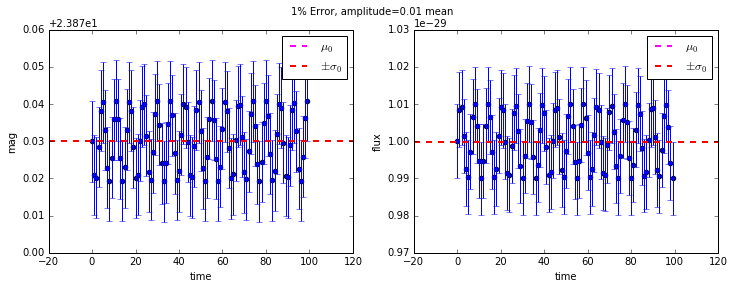

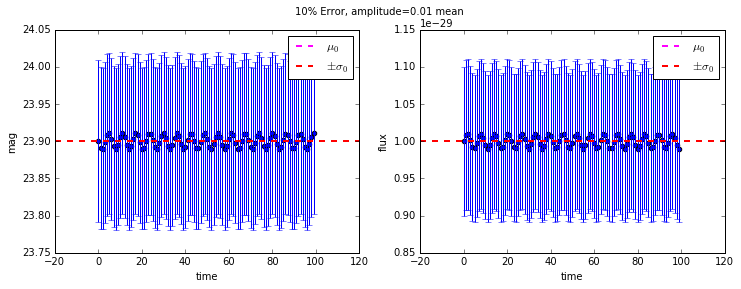

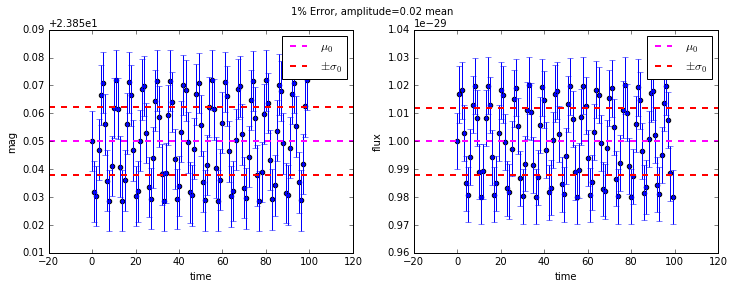

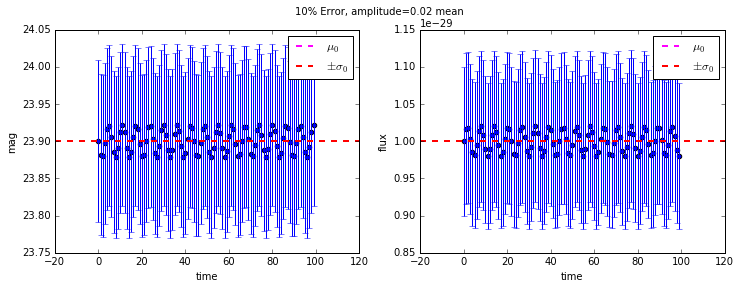

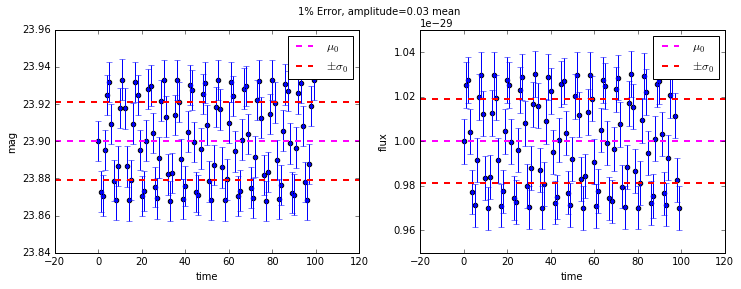

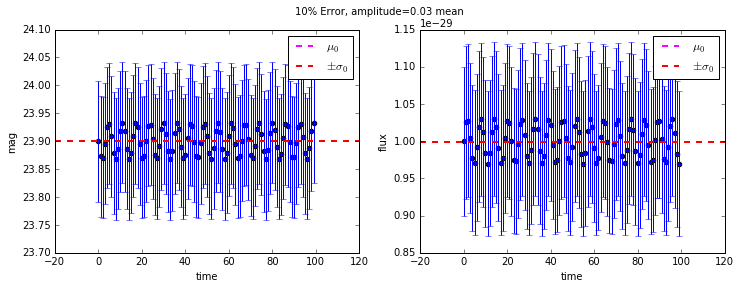

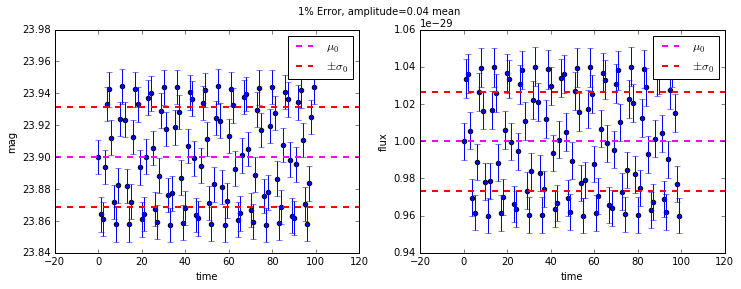

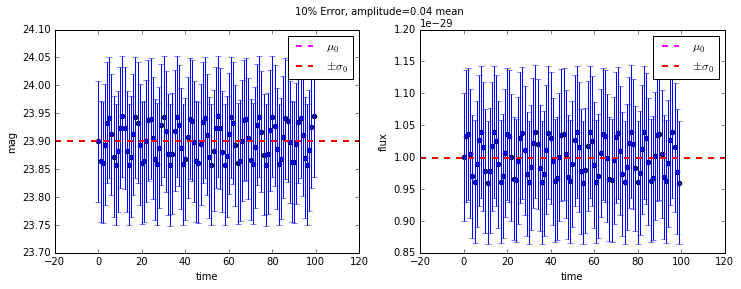

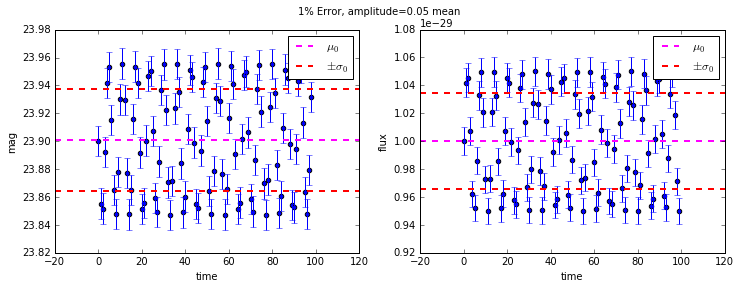

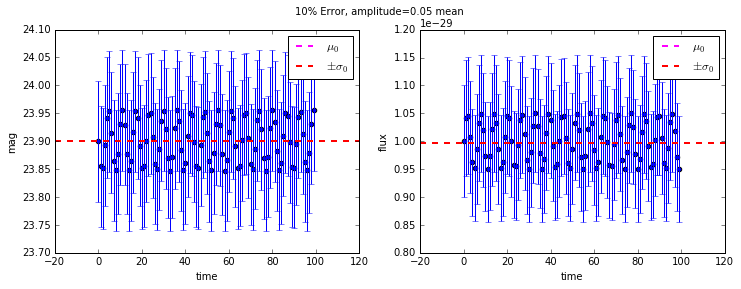

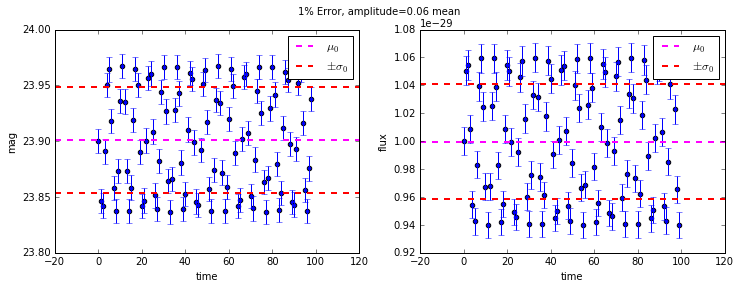

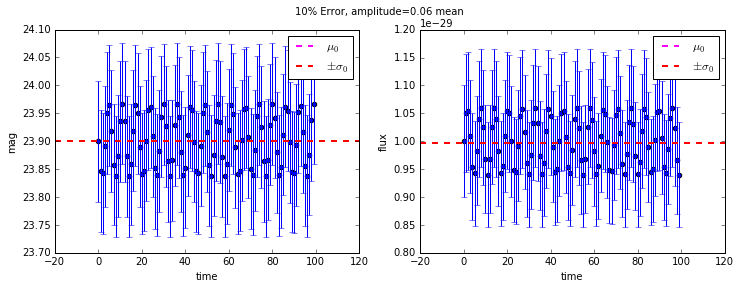

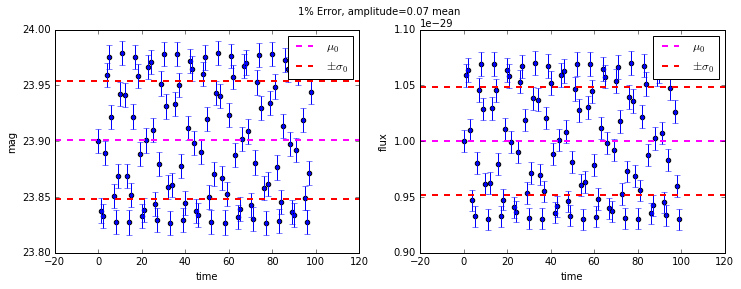

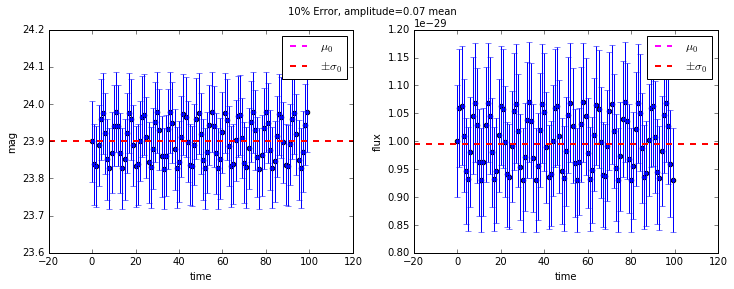

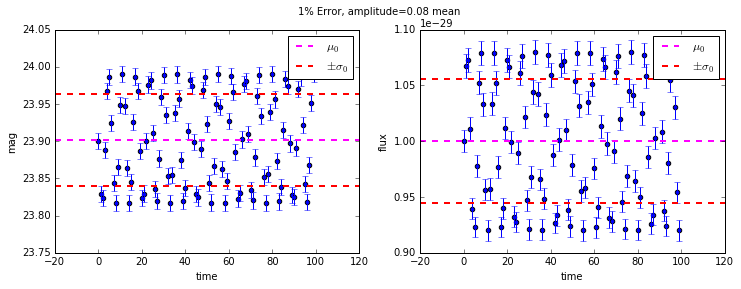

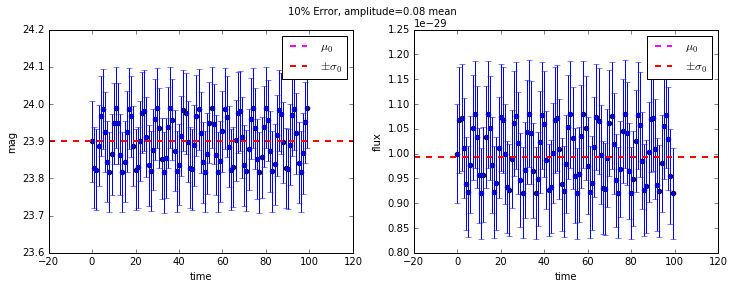

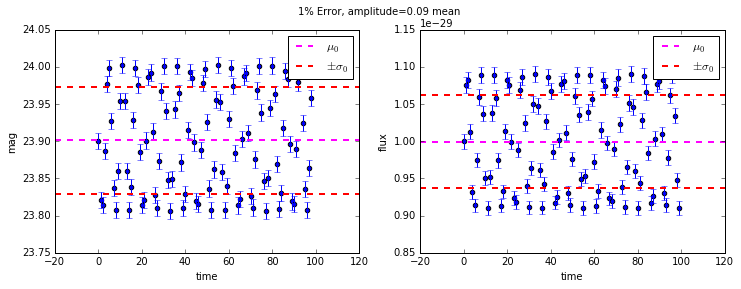

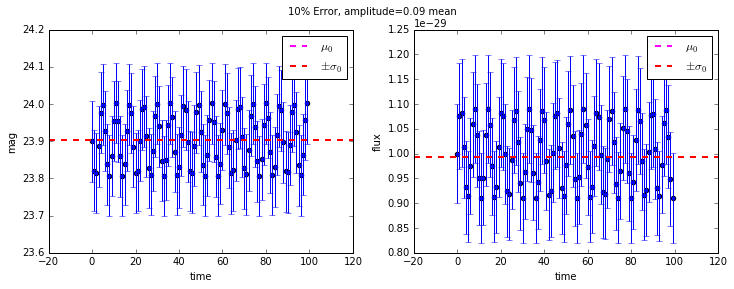

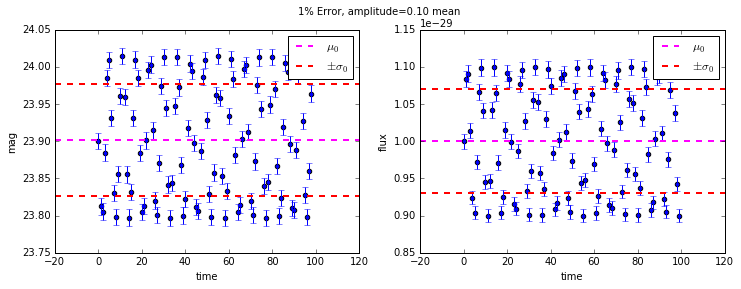

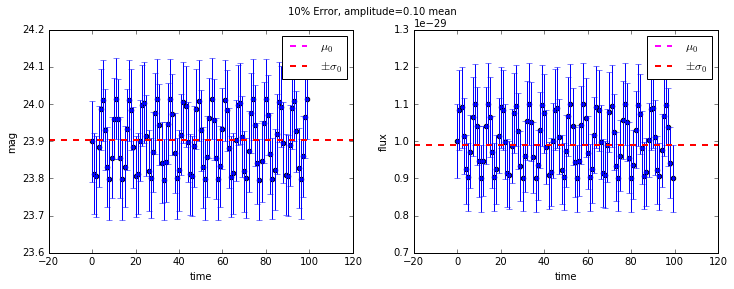

In [68]:
%matplotlib inline
error_factors = [0.01, 0.1]
amplitudes = np.linspace(0.01, 0.1, 10)
# np.linspace(0.01, 0.1,10)
for amp_factor in amplitudes : 
    for factor in error_factors:
        t = np.arange(100)
        flux_mean = 1e-29
        A = amp_factor * F_mean
        flux = A * np.sin(t)+ flux_mean
        #factor = 0.1
        flux_err = factor*flux

        def flux2absigma(flux, fluxsigma):
          """Compute AB mag sigma given flux and flux sigma"""
          FIVE_OVER_2LOG10 = 1.085736204758129569
          return FIVE_OVER_2LOG10 * fluxsigma / flux;


        def flux2ab(flux):
          """Compute AB mag given flux"""
          return -2.5 * np.log10(flux) - 48.6;



        mag = flux2ab(flux)
        mag_err = flux2absigma(flux,flux_err)


        mu_mag, sigma_mag =  varF.get_mu_sigma(mag,mag_err)
        mu_flux, sigma_flux = varF.get_mu_sigma(flux, flux_err)


        fig,ax = plt.subplots(1,2, figsize=(12,4))

        ax[0].errorbar(t,mag,mag_err, fmt='None')
        ax[0].scatter(t,mag)
        ax[0].axhline(mu_mag, ls='--', lw=2, color='magenta', label=r'$\mu_{0}$')
        ax[0].axhline(mu_mag+sigma_mag,ls='--', lw=2, color='red',label=r'$\pm \sigma_{0}$')
        ax[0].axhline(mu_mag-sigma_mag,ls='--', lw=2, color='red')
        ax[0].set_xlabel('time')
        ax[0].set_ylabel('mag')
        ax[0].legend()


        ax[1].errorbar(t,flux,flux_err, fmt='None')
        ax[1].scatter(t,flux)
        ax[1].axhline(mu_flux, ls='--', lw=2, color='magenta', label=r'$\mu_{0}$')
        ax[1].axhline(mu_flux+sigma_flux,ls='--', lw=2, color='red',label=r'$\pm \sigma_{0}$')
        ax[1].axhline(mu_flux-sigma_flux,ls='--', lw=2, color='red')
        ax[1].set_xlabel('time')
        ax[1].set_ylabel('flux')
        ax[1].legend()

        fig.suptitle('%d%% Error, amplitude=%.2f mean'%(100*factor,amp_factor))
        plt.show()